In [1]:
# analysis and plotting modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# matplotlib plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import image as mimage
from matplotlib import rcParams
from matplotlib import patches as mpatches
from matplotlib import dates as mdates
from matplotlib import lines as mlines
from matplotlib import colors as mcolors
from matplotlib import collections as mcollections
from matplotlib import text as mtext
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, FuncFormatter)

# handles dates and statistics
import datetime
import scipy.stats
import statsmodels.api as sm

# custom scripts. Start with the aesthetics scheme
from scripts import aesthetics
aesthetics.activate_paper_rcParams()

# custom scripts for visualizing specific datasets
from scripts import lollipop
from scripts import phylogic_visualization
from scripts import copynumber

# helper functions related to figures
from scripts import figures
sns.stripplot = figures.stripplot

# pdfs do not render matplotlib's alpha. We need to manually convert it to an RGB color.
from scripts import mimic_alpha

# other figure imports
from matplotlib_venn import venn2
from brokenaxes import brokenaxes

import palettable
bold_10 = palettable.cartocolors.qualitative.Bold_10.mpl_colors

# comutation plots
from comut import comut

# MPCproject paper figures and analyses

This notebook regenerates the main figures and most analyses for the Metastatic Prostate Cancer project (MPCproject) paper. To generate the figures, run all cells. Data included is processed, deidentified, and summary level to protect patient privacy. Analyses that require more confidential data (e.g. sample level germline mutations) are not reproduced here but are available upon request with controlled data access.

The structure of the code is to first load in the requisite data, then create the figure in another code cell.

# Figure 1. Partnering with diverse patients to enhance our understanding of metastatic prostate cancer

In [2]:
# figure 1a - figure schematic created using biorender
study_schematic = mimage.imread('ref/images/mpcproject-overview.png')

# figure 1b - enrollment data
combined_enrollment_df = pd.read_csv('ref/data/enrollment-data.csv', parse_dates = [0])

# figure 1c - institution plot
institution_counts = pd.read_csv('ref/data/institution-counts.csv')

# figure 1d and e - geographic access and NCI attendance. Data has been shuffled to protect privacy
# 675 patient-partners have at least one aspect of these, but all reported therapies.
hpsa_mua_rural_adi_nci = pd.read_csv('ref/data/hpsa-mua-rural-adi-nci.csv')
rural_pt_partners = np.where(hpsa_mua_rural_adi_nci['RURAL'] == 1)[0]
hpsa_pt_partners = np.where(hpsa_mua_rural_adi_nci['In a Primary Care HPSA:'] == 1)[0]
mua_pt_partners = np.where(hpsa_mua_rural_adi_nci['In a MUA/P:'] == 1)[0]

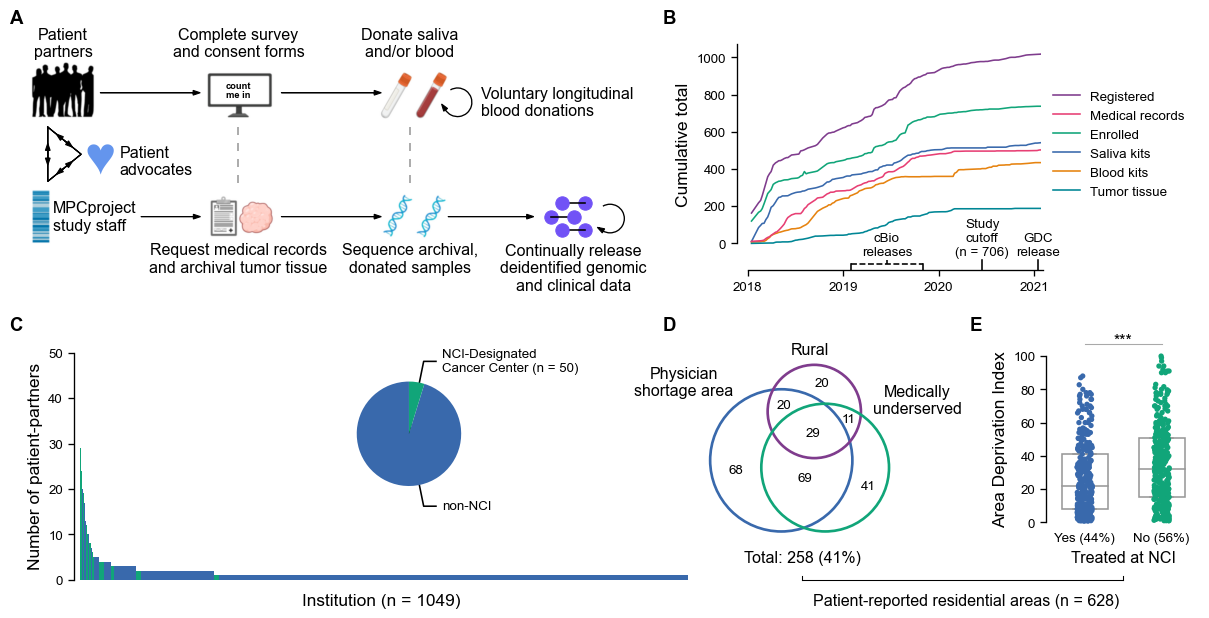

In [3]:
# Create the figure object and gridspec
fig1 = plt.figure(figsize=(16, 8), tight_layout=False)
gs = fig1.add_gridspec(8, 16, hspace = 1, wspace = 1, width_ratios = [3] + [1]*8 + [0.4] + [1]*5 + [4], height_ratios = [0.1,1,1,1,0.1,1,1,1])

############################################
###### FIG 1A - MPCproject schematic #######
############################################

ax = fig1.add_subplot(gs[:5, :9])

# input study schematic, which is just the images
ax.imshow(study_schematic, interpolation='gaussian')

# turn off axes
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# set x and y scales based on panel dimensions to have accurate placing
xscale, yscale = 4800/64, 1980/26.4

# transform that aids in plotting
inv = ax.transData.inverted()

# Begin to add text and arrows to the figure. Begin with the left images.
patients = ax.text(s = 'Patient\npartners', x = 5.6*xscale, y = 3.5*yscale, ha = 'center', va = 'bottom')
mpcproj = ax.text(s = 'MPCproject\nstudy staff', x = 4.5*xscale, y = 20*yscale, ha = 'left', va = 'center')

# do the up right arrow
up_right = lambda x: (10.6 - 13.45)/(7.5 - 4) * x
x_dist = 2.6
y_dist = up_right(x_dist)
ax.arrow(x = 4*xscale, y = 16.3*yscale, dx = x_dist*xscale, dy = y_dist*yscale, 
         length_includes_head=True, head_width = 0.5*xscale, color = 'black')

x_dist = -2.6
y_dist = up_right(x_dist)
ax.arrow(x = 7.5*xscale, y = 13.45*yscale, dx = x_dist*xscale, dy = y_dist*yscale, 
         length_includes_head=True, head_width = 0.5*xscale, color = 'black')

# do the down right arrow
down_right = lambda x: (16.3 - 13.45)/(7.5 - 4) * x
x_dist = 2.6
y_dist = down_right(x_dist)
ax.arrow(x = 4*xscale, y = 10.6*yscale, dx = x_dist*xscale, dy = y_dist*yscale, 
         length_includes_head=True, head_width = 0.5*xscale, color = 'black')

x_dist = -2.6
y_dist = down_right(x_dist)
ax.arrow(x = 7.5*xscale, y = 13.45*yscale, dx = x_dist*xscale, dy = y_dist*yscale, 
         length_includes_head=True, head_width = 0.5*xscale, color = 'black')

# and finally, the up down arrow
ax.arrow(x = 4*xscale, y = 10.6*yscale, dx = 0, dy = 4*yscale, 
         length_includes_head=True, head_width = 0.5*xscale, color = 'black')

ax.arrow(x = 4*xscale, y = 16.3*yscale, dx = 0, dy = -4*yscale, 
         length_includes_head=True, head_width = 0.5*xscale, color = 'black')

# make triangle that connects patient-partners, patient advocates, and MPCproject
ax.plot([4*xscale, 4*xscale, 7.5*xscale, 4*xscale], [10.6*yscale, 16.3*yscale, 13.45*yscale, 10.6*yscale], color = 'black', linewidth = 1)

# add the patient advocates and the "logo" for them
ax.text(s = 'Patient\nadvocates', x = 11.5*xscale, y = 14.2*yscale, ha = 'left', va = 'center')
ax.text(s = '♥', color = 'cornflowerblue', x = 11*xscale, y = 14.2*yscale, fontsize = 37, ha = 'right', va = 'center')

# arrows to next part. To make lower arrow, we have to identify the bbox of the mpc project text in data coordinates, 
# which can only take place after the rendering of the figure
ax.arrow(x = 9.5*xscale, y = 7*yscale, dx = 10.5*xscale, dy = 0, length_includes_head=True, head_width = 0.5*xscale, color = 'black')
plt.draw()
mpc_corner = inv.transform(mpcproj.get_window_extent().get_points()[1])
ax.arrow(x = mpc_corner[0] + 0.5*xscale, y = 20*yscale, dx = 6.25*xscale, dy = 0, length_includes_head=True, head_width = 0.5*xscale, color = 'black')

# make the middle text - lines up with "Patients"
pts_corner = inv.transform(patients.get_window_extent().get_points())
survey = ax.text(s = 'Complete survey\nand consent forms', x = 24*xscale, y = np.mean([pts_corner[0][1], pts_corner[1][1]]) - 2*yscale, 
                 ha = 'center', va = 'center', multialignment = 'center')
ax.text(s = 'count\nme in', x = 24*xscale, y = 6.75*yscale, color = 'black', fontweight = 'bold', ha = 'center', 
        va = 'center', fontsize = 7, linespacing = 1)

request = ax.text(s = 'Request medical records\nand archival tumor tissue', x = 24*xscale, y = 24.4*yscale, 
                 ha = 'center', va = 'center', multialignment = 'center')

# make a dotted line to connect survey and medical records
dashed_color = mimic_alpha.colorAlpha_to_rgb(['black'], 0.4)[0]
ax.plot([24*xscale, 24*xscale], [10.6*yscale, 17*yscale], color = dashed_color, linestyle = (0, (5, 5)))

ax.arrow(x = 28.5*xscale, y = 7*yscale, dx = 10.5*xscale, dy = 0, length_includes_head=True, head_width = 0.5*xscale, color = 'black')
ax.arrow(x = 28.5*xscale, y = 20*yscale, dx = 10.5*xscale, dy = 0, length_includes_head=True, head_width = 0.5*xscale, color = 'black')

ax.plot([42*xscale, 42*xscale], [10.6*yscale, 17*yscale], color = dashed_color, linestyle = (0, (5, 5)))

# add text related to sample donation
donate = ax.text(s = 'Donate saliva\nand/or blood', x = 42*xscale, y = np.mean([pts_corner[0][1], pts_corner[1][1]]) - 2*yscale, 
                 ha = 'center', va = 'center', multialignment = 'center')
sequence = ax.text(s = 'Sequence archival,\ndonated samples', x = 42*xscale, y = 24.4*yscale, 
                 ha = 'center', va = 'center', multialignment = 'center')

ax.arrow(x = 46*xscale, y = 20*yscale, dx = 9*xscale, dy = 0, length_includes_head=True, head_width = 0.5*xscale, color = 'black')

# place the release text box aligned at the top with sequence text box
cont_donations = ax.text(s = 'Voluntary longitudinal\nblood donations', x = 49.5*xscale,  y = 8*yscale, 
                 ha = 'left', va = 'center')
seq_box = inv.transform(sequence.get_window_extent().get_points())
seq_height = seq_box[1][1] - seq_box[0][1]
cont_release = ax.text(s = 'Continually release\ndeidentified genomic\nand clinical data', x = 51.5*xscale, y = 24.2*yscale + seq_height/2, 
                       ha = 'left', va = 'top', multialignment = 'center')

release_box = inv.transform(cont_release.get_window_extent().get_points())
release_center = (release_box[0][0] + release_box[1][0])/2
mpc_width = 2.4*xscale

# add MPC logo
coords = [((release_center - 1/2*mpc_width, 18.6*yscale, 2), (release_center + 1/2*mpc_width, 18.6*yscale, 1)),
          ((release_center - mpc_width, 20*yscale, 1), (release_center, 20*yscale, 2)),
          ((release_center - 1/2*mpc_width, 21.4*yscale, 2), (release_center + 1/2*mpc_width, 21.4*yscale, 1))]

for pair in coords:
    for circle in pair:
        ax.scatter(x = circle[0], y = circle[1], color = '#7152F6', s = 100, zorder = circle[2])
    ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[0][1]], zorder = 1, color = 'black')

# add loops next to test tubes
center = np.array([47*xscale, 8*yscale])
radius = np.array([3*xscale, 3*yscale])
point2 = center + radius * np.array([np.cos(np.radians(150)), np.sin(np.radians(150))])
ax.arrow(x = point2[0]+1.06*xscale, y = point2[1]-1.12*yscale, dx = -0.14*xscale, dy = -0.2*yscale, length_includes_head = True, head_width = 0.5*xscale, color = 'black')
arc = mpatches.Arc(center, radius[0], radius[1], angle = 0, theta1 = -120, theta2=150.0, linewidth = 1)
ax.add_patch(arc)

# loop next to MPC logo
center = np.array([63*xscale, 20.2*yscale])
radius = np.array([3*xscale, 3*yscale])
point2 = center + radius * np.array([np.cos(np.radians(150)), np.sin(np.radians(150))])
ax.arrow(x = point2[0]+1.4*xscale, y = point2[1]-0.5*yscale, dx = -0.14*xscale, dy = -0.08*yscale, length_includes_head = True, head_width = 0.5*xscale, color = 'black')
arc = mpatches.Arc(center, radius[0], radius[1], angle = 0, theta1 = -120, theta2=120.0, linewidth = 1)
ax.add_patch(arc)

sns.despine(ax = ax, bottom = True, left = True)

##########################################
###### FIG 1B - MPCproject accrual #######
##########################################

# this figure is split up into two - the timeline below the line plot, and the line plot
fig1b = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1:4, 10:-1], height_ratios = [8,1], hspace = 0)
ax_1b_timeline = fig1.add_subplot(fig1b[1])
ax_1b = fig1.add_subplot(fig1b[0], sharex = ax_1b_timeline)

# make the line plot
palette = {'Registered': bold_10[0], 'Medical records': bold_10[4], 'Enrolled': bold_10[1], 'Saliva kits': bold_10[2], 
           'Blood kits': bold_10[6], 'Tumor tissue': bold_10[7]}
sns.lineplot(data = combined_enrollment_df, x = 'Date', y = 'value', hue = 'variable', ax = ax_1b, palette = palette)

### format the axes of the line plot

# y axis
ax_1b.set_ylabel('Cumulative total')
ax_1b.set_ylim(-10, None)
ax_1b.spines['left'].set_bounds([0, ax_1b.get_ylim()[1]])

# x axis
sns.despine(ax = ax_1b, bottom = True)
ax_1b.get_xaxis().set_visible(False)
left, right = ax_1b.get_xlim()
ax_1b.set_xlim(left, (right - left) * 0.95 + left)

# adjust the legend and its ordering
handles, labels = ax_1b.get_legend_handles_labels()
leg_elements = {label: handle for label, handle in zip(labels, handles)}
order = ['Registered', 'Medical records', 'Enrolled', 'Saliva kits', 'Blood kits', 'Tumor tissue']
leg_elements = {key: leg_elements[key] for key in order}
ax_1b.legend(handles = leg_elements.values(), labels = leg_elements.keys(), bbox_to_anchor = (1,0.5), fontsize = 10)

# next we create the timeline. We label some important dates with ticks:
first_cbio = datetime.datetime(2019, 2, 1, 0, 0, 0)
second_cbio = datetime.datetime(2019, 11, 1, 0, 0, 0)
middle = first_cbio + (second_cbio - first_cbio)/2

dates = {'cBio\nreleases': [middle, 0.5],
         'Study\ncutoff\n(n = 706)': [datetime.datetime(2020, 6, 15, 0, 0, 0), 0.5],
         'GDC\nrelease': [datetime.datetime(2021, 1, 15, 0, 0, 0), 0.5]}

# unfortunately, the text labels on the timeline cut into the enrollment axis. This means
# they need to be defined in figure coordinates (otherwise they won't show)
ax_1b_timeline_transform = ax_1b_timeline.transData
fig1_inv_transform = fig1.transFigure.inverted()

# add the labels to the timeline
ax_1b_timeline.set_ylim([0, 1])
for ev, dt in dates.items():
    plot_loc = dt
    plot_loc[0] = mdates.date2num(plot_loc[0])
    fig_coords = fig1_inv_transform.transform(ax_1b_timeline_transform.transform(plot_loc))
    fig1.text(s = ev, x = fig_coords[0], y = fig_coords[1], ha = 'center', fontsize = 10, va = 'bottom')

    if ev != 'cBio\nreleases':
        ax_1b_timeline.plot([dt[0], dt[0]], [0, 0.42], color = 'black')
    
    else:
        ax_1b_timeline.plot([first_cbio, first_cbio], [0, 0.25], color = 'black')
        ax_1b_timeline.plot([second_cbio, second_cbio], [0.25, 0], color = 'black')
        ax_1b_timeline.plot([first_cbio, second_cbio], [0.25, 0.25], color = 'black', linestyle = 'dashed')
        ax_1b_timeline.plot([middle, middle], [0.25, 0.42], color = 'black', linestyle = 'dashed')

# add year labels
years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')
ax_1b_timeline.xaxis.set_major_locator(years)
ax_1b_timeline.xaxis.set_major_formatter(years_fmt)
ax_1b_timeline.tick_params(axis = 'x', rotation = 0)

# format the axes of the timeline
sns.despine(ax = ax_1b_timeline, left = True)
ax_1b_timeline.tick_params(axis = 'y', length = 0)
ax_1b_timeline.set_yticklabels([])
xlims = (mdates.date2num(datetime.datetime(2018, 1, 1, 0, 0, 0)), mdates.date2num(datetime.datetime(2021, 2, 1, 0, 0, 0)))
ax_1b_timeline.spines['bottom'].set_bounds(xlims)

# a spacer axis that is left blank
blank_ax = ax_1b_timeline = fig1.add_subplot(gs[1:4, -1])
blank_ax.axis('off')

###############################################
###### FIG 1C - MPCproject institutions #######
###############################################

# to ensure consistent spacing between 1C, 1D, and 1E, they are all part of the same gridspec
fig1cde = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec = gs[5:, :], width_ratios = [0.6, 8, -1.5, 5, 0.2, 2], wspace = 0.1)

# begin figure 1C
ax_1c = fig1.add_subplot(fig1cde[1])

institution_count_plot = institution_counts.copy().sort_values(by = ['COUNT', 'NCI'], ascending = False).reset_index()
barplot = ax_1c.bar(range(len(institution_count_plot)), institution_count_plot['COUNT'], width = 1.01, color = bold_10[2])

# annotate nci centers by coloring the bars
nci_centers = institution_count_plot[institution_count_plot['NCI']]
for index, row in nci_centers.iterrows():
    barplot[index].set_facecolor(bold_10[1])

# label the axes
sns.despine(bottom = True, ax = ax_1c)
ax_1c.set_xticks([])
ax_1c.set_xlim([-10, len(institution_count_plot)])
ax_1c.set_ylim([0, 50])
ax_1c.set_ylabel('Number of patient-partners')
ax_1c.set_xlabel('Institution (n = {})'.format(len(institution_count_plot)), labelpad = 10)

# add pie chart - it exists in its own axis
proportions = institution_count_plot['NCI'].value_counts()/len(institution_count_plot)
pie_chart_loc = [0.30, 0.23, 0.17]
pie_chart_ax = fig1.add_axes([pie_chart_loc[0], pie_chart_loc[1], pie_chart_loc[2], pie_chart_loc[2]])
pie_chart_ax.axis('equal')
pie_chart_ax.pie(proportions, colors=[bold_10[2], bold_10[1]], startangle=90)

# add lines exiting from the pie chart for labelling
center_pie_ax_loc = ax_1c.transAxes.inverted().transform(fig1.transFigure.transform((pie_chart_loc[0] + pie_chart_loc[2]/2, pie_chart_loc[1] + pie_chart_loc[2]/2)))
angle = np.pi/2 - len(institution_counts[institution_counts['NCI']])/(len(institution_counts))*2*np.pi/4

end = np.array(center_pie_ax_loc) + 0.32*np.array([np.cos(angle), np.sin(angle)])

# add the NCI label first
ax_1c.plot([center_pie_ax_loc[0], end[0], end[0] + 0.02], 
           [center_pie_ax_loc[1], end[1], end[1]], 
           transform = ax_1c.transAxes, color = 'black')

ax_1c.text(s = 'NCI-Designated\nCancer Center (n = {})'.format(institution_counts['NCI'].sum()), ha = 'left', va = 'center',
           x = end[0] + 0.03, y = end[1], transform = ax_1c.transAxes, fontsize = 10)

# then the non-NCI label. This is a reflection of the first
angle_2 = 3*np.pi/2 + len(institution_counts[institution_counts['NCI']])/(len(institution_counts))*2*np.pi/4
end_2 = np.array(center_pie_ax_loc) + 0.32*np.array([np.cos(angle_2), np.sin(angle_2)])
ax_1c.plot([center_pie_ax_loc[0], end_2[0], end_2[0] + 0.02], 
           [center_pie_ax_loc[1], end_2[1], end_2[1]], 
           transform = ax_1c.transAxes, color = 'black')
ax_1c.text(s = 'non-NCI', ha = 'left', va = 'center',
           x = end_2[0] + 0.03, y = end_2[1], transform = ax_1c.transAxes, fontsize = 10)

#########################################
###### FIG 1D - Geographic Access #######
#########################################

# figure 1D exists within 2 specs, one of which is a spacer axis
fig1d = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig1cde[3], height_ratios = [4, 0.2], hspace = 0.1)

venn_ax = fig1.add_subplot(fig1d[0])
blank_ax = fig1.add_subplot(fig1d[1]).axis('off')

# first, we just add the venn diagram to get the number positions (positions are inaccessible when circles are added)
v = figures.venn_diagram(hpsa_pt_partners, rural_pt_partners, mua_pt_partners, venn_ax, 
                          labels = ['Physician\nshortage area', 'Rural', 'Medically\nunderserved'], 
                          circles = False)
coordinates = [(child.get_position(), child.get_text()) for child in venn_ax.get_children() if isinstance(child, (mtext.Text)) and child.get_text().isnumeric()]
venn_ax.clear()

# with the coordinates defined, we create the venn diagram, then rotate the text and format circles 
# for readability
angle = -17.83
v = figures.venn_diagram(hpsa_pt_partners, rural_pt_partners, mua_pt_partners, venn_ax)
circ_colors = [bold_10[2], bold_10[0], bold_10[1]]
for i, circ in enumerate(v):
    circ.set_ec(circ_colors[i])
    curr_center = circ.get_center()
    new_center = figures.rotate((0, 0), curr_center, angle)
    if i == 1: new_center += np.array([0.02, 0])
    circ.set_center(new_center)

offsets = {5: [0.0, -0.02], 6: [0.04, 0], 1: [-0.03, -0.03], 2: [0, 0.01]}
for i, (coord, text) in enumerate(coordinates):
    x, y = coord
    
    if i in offsets:
        x += offsets[i][0]
        y += offsets[i][1]
        
    x, y = figures.rotate((0, 0), (x, y), angle)
    venn_ax.text(x = x, y = y, s = text, ha = 'center', va = 'center', fontsize = 10)
    
# add text labels
venn_ax.text(x = -0.80, y = 0.37, s = 'Physician\nshortage area', ha = 'center', va = 'bottom')
venn_ax.text(x = 0.77, y = 0.25, s = 'Medically\nunderserved', ha = 'center', va = 'bottom')
venn_ax.text(x = 0.05, y = 0.65, s = 'Rural', ha = 'center', va = 'bottom')

# now we add the total
total = len(set(hpsa_pt_partners).union(set(rural_pt_partners)).union(set(mua_pt_partners)))
percentage = int(round(total/628 * 100))
venn_ax.text(s = f'Total: {total} ({percentage}%)', x = 0, y = -0.7, ha = 'center', va = 'center')

###################################
###### FIG 1E - NCI vs. ADI #######
###################################

# Figure 1e again exists within 2 specs, one of which is a spacer axis
fig1e = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig1cde[5], height_ratios = [4, 1], hspace = 0.1)
ax_1e = fig1.add_subplot(fig1e[0])
blank_ax = fig1.add_subplot(fig1e[1]).axis('off')

# add the stripplot
order = [True, False]
sns.stripplot(x = 'NCI', y = 'ADI_NATRNK', data = hpsa_mua_rural_adi_nci, 
              order = order, ax = ax_1e, s = 4, palette = {False: bold_10[1], True: bold_10[2]})
sns.boxplot(x = 'NCI', y = 'ADI_NATRNK', data = hpsa_mua_rural_adi_nci, 
              order = order, color = 'white', ax = ax_1e, fliersize = 0, width = 0.6, whis=0)

# adding a p value line is annoying because it needs to exist outside the axis bounds 
ax_1e.text(x = 0.5, y = 105, s = '***', ha = 'center', va = 'bottom')
line_left = fig1_inv_transform.transform(ax_1e.transData.transform((0, 0)))[0]
line_right = fig1_inv_transform.transform(ax_1e.transData.transform((1, 0)))[0]
line_y = fig1_inv_transform.transform(ax_1e.transAxes.transform((0.5, 1.05)))[1]
p_val_line = mlines.Line2D([line_left, line_right], [line_y, line_y], color = 'darkgrey',
                   linewidth = 0.8, transform=fig1.transFigure, figure=fig1)

fig1.lines.extend([p_val_line])

# format the axis
sns.despine(ax = ax_1e, bottom = True)
ax_1e.set_ylim([-2, 102])
ax_1e.spines['left'].set_bounds([0, 100])

ax_1e.set_xlabel('Treated at NCI', fontsize = 12, labelpad = 4.3)
ax_1e.set_ylabel('Area Deprivation Index')

ax_1e.set_xticklabels(['Yes (44%)','No (56%)'])

ax_1e.tick_params(axis = 'x', length = 0, pad = 5)

#####################
#### 1D/E Label  ####
#####################

middle_ax = fig1.add_subplot(fig1cde[4])
middle_ax.text(x = -3, y = -0.06, s = 'Patient-reported residential areas (n = 628)',
               ha = 'center', va = 'top')
middle_ax.axis('off')

# next we add a line to show the addresses correspond to 1D/1E
line_left = fig1_inv_transform.transform(venn_ax.transAxes.transform((0.5, 1)))[0]
line_right = fig1_inv_transform.transform(ax_1e.transAxes.transform((0.5, 1)))[0]
line_y = fig1_inv_transform.transform(middle_ax.transAxes.transform((0.5, 0)))[1]

l = mlines.Line2D([line_left, line_right], [line_y, line_y], color = 'black',
                   linewidth = 0.8, transform=fig1.transFigure, figure=fig1)

# add some extenders to the sides of the line
l1 = mlines.Line2D([line_left, line_left], [line_y, line_y*1.04], color = 'black',
                   linewidth = 0.8, transform=fig1.transFigure, figure=fig1)
l2 = mlines.Line2D([line_right, line_right], [line_y, line_y*1.04], color = 'black',
                   linewidth = 0.8, transform=fig1.transFigure, figure=fig1)

fig1.lines.extend([l, l1, l2])

#####################
### Figure labels  ##
#####################

top_row_y = 0.85
bottom_row_y = 0.45

x_coords = [0.125, 0.55, 0.125, 0.55, 0.75]
for label, coord in zip(['A', 'B', 'C', 'D', 'E'], x_coords):
    y = top_row_y if label < 'C' else bottom_row_y
    fig1.text(s = label, x = coord, y = y, transform = fig1.transFigure, weight = 'bold', fontsize = 14)
    
fig1.savefig('figures/figure1.png', dpi = 300, bbox_inches = 'tight')
fig1.savefig('figures/figure1.svg', bbox_inches = 'tight')
fig1.savefig('figures/figure1.pdf', bbox_inches = 'tight')

## Figure 1 Analyses

These are related to analyses cited in the text up to figure 2.

In [4]:
# 91% of institutions are reported by 2 or fewer patient-partners
institution_counts[institution_counts['COUNT'] <= 2].shape[0] / institution_counts.shape[0]

0.9065776930409915

In [5]:
# 56% of patient-partners have never received care at an NCI center
(hpsa_mua_rural_adi_nci['NCI'] == 0).sum() / len(hpsa_mua_rural_adi_nci['NCI'].dropna())

0.5575485799701047

In [6]:
# patient-partners attending NCI centers are 3x times more likely to report being part of a clinical trial
# 7% vs. 20%
print(hpsa_mua_rural_adi_nci.groupby(['NCI'])['OTHER_THERAPIES.EXP_CLINICAL_TRIAL'].mean())

# fisher exact testc
contingency_table = hpsa_mua_rural_adi_nci.groupby(['NCI', 'OTHER_THERAPIES.EXP_CLINICAL_TRIAL']).size().values.reshape((2, 2))
val, p = scipy.stats.fisher_exact(contingency_table)
print('p value:', p)

NCI
0.0    0.069705
1.0    0.195946
Name: OTHER_THERAPIES.EXP_CLINICAL_TRIAL, dtype: float64
p value: 1.0921785613354798e-06


In [7]:
# 13%, 30%, and 23% of patient-partners live in rural areas
print('Rural proportion:', hpsa_mua_rural_adi_nci['RURAL'].sum() / len(hpsa_mua_rural_adi_nci['RURAL'].dropna()))
print('HPSA proportion:', hpsa_mua_rural_adi_nci['In a Primary Care HPSA:'].sum() / len(hpsa_mua_rural_adi_nci['In a Primary Care HPSA:'].dropna()))
print('MUA proportion:', hpsa_mua_rural_adi_nci['In a MUA/P:'].sum() / len(hpsa_mua_rural_adi_nci['In a MUA/P:'].dropna()))

# and 41% of patient partners live in at least one of these
hpsa_mua_rural_adi_nci_no_nans = hpsa_mua_rural_adi_nci.dropna(subset=['In a Primary Care HPSA:', 'RURAL', 'In a MUA/P:'], how='all')
sum(hpsa_mua_rural_adi_nci_no_nans[['In a Primary Care HPSA:', 'RURAL', 'In a MUA/P:']].any(axis=1)) / len(hpsa_mua_rural_adi_nci_no_nans)

Rural proportion: 0.12738853503184713
HPSA proportion: 0.2961783439490446
MUA proportion: 0.23885350318471338


0.410828025477707

In [8]:
# being in a rural area is associated with being in a MUA or HPSA
hpsa_mua_rural_adi_nci['MUA or HPSA'] = hpsa_mua_rural_adi_nci[['In a Primary Care HPSA:', 'In a MUA/P:']].any(axis=1)
contingency_table = hpsa_mua_rural_adi_nci.groupby(['RURAL', 'MUA or HPSA']).size().values.reshape((2, 2))
val, p = scipy.stats.fisher_exact(contingency_table)
print('p value:', p)

p value: 5.714963233744714e-13


In [9]:
# 28% of patient partners live in urban MUAs or HPSAs
((hpsa_mua_rural_adi_nci['MUA or HPSA'] == 1) & (hpsa_mua_rural_adi_nci['RURAL'] == 0)).sum() / len(hpsa_mua_rural_adi_nci_no_nans)

0.28343949044585987

In [10]:
# patient-partners in rural areas travel ~160 km farther to receive care
travel_distances = pd.read_csv('ref/data/rural-distances.csv')
rural_distances = travel_distances[travel_distances['Rural']]['Log10_distance'].dropna()
nonrural_distance = travel_distances[travel_distances['Rural'] == False]['Log10_distance'].dropna()
print(10**rural_distances.median(), 10**nonrural_distance.median())
scipy.stats.mannwhitneyu(rural_distances, nonrural_distance)

210.4756322615823 43.136553947497845


MannwhitneyuResult(statistic=30642.0, pvalue=5.766523111257924e-12)

In [11]:
# average ADI
hpsa_mua_rural_adi_nci['ADI_NATRNK'].mean()

31.284965430001222

In [12]:
## NCI cancer center attendance is associated with ADI even after controlling for MUA, HPSA, and rural status

# we begin by dropping observations that don't have all data
hpsa_mua_rural_adi_nci_analysis = hpsa_mua_rural_adi_nci.dropna(how='any')

X = hpsa_mua_rural_adi_nci_analysis[['ADI_NATRNK', 'RURAL', 'In a Primary Care HPSA:', 'In a MUA/P:']].values
y = hpsa_mua_rural_adi_nci_analysis['NCI'].values

X2 = sm.add_constant(X)

logit_model=sm.Logit(y,X2)
result=logit_model.fit()
summary = result.summary()
print(summary)

# print the wald test results
print(result.wald_test('x1=0', scalar=True).summary())

Optimization terminated successfully.
         Current function value: 0.675452
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  621
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Jun 2022   Pseudo R-squ.:                 0.02245
Time:                        14:38:01   Log-Likelihood:                -419.46
converged:                       True   LL-Null:                       -429.09
Covariance Type:            nonrobust   LLR p-value:                 0.0006958
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3159      0.138      2.282      0.023       0.045       0.587
x1            -0.0164      0.

In [13]:
# an alternate way to ask this question is to ask how much better model performance becomes when ADI rank is included
X = hpsa_mua_rural_adi_nci_analysis[['RURAL', 'In a Primary Care HPSA:', 'In a MUA/P:']].values
y = hpsa_mua_rural_adi_nci_analysis['NCI'].values

X2 = sm.add_constant(X)

logit_model=sm.Logit(y,X2)
result=logit_model.fit()
summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.688063
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  621
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 Jun 2022   Pseudo R-squ.:                0.004201
Time:                        14:38:01   Log-Likelihood:                -427.29
converged:                       True   LL-Null:                       -429.09
Covariance Type:            nonrobust   LLR p-value:                    0.3074
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0572      0.100     -0.574      0.566      -0.253       0.138
x1             0.1577      0.

So we can see that none of these are significant predictors of NCI status.

# Figure 2. Patient voices reveal the landscape of living with metastatic prostate cancer

In [14]:
# figure 2a - metastatic locations
plot_data = pd.read_csv('ref/data/met-locations.csv')

# figure 2b-d - bar charts
other_prd_freqs = pd.read_csv('ref/data/bar-charts.csv')

# figure 2e - therapy overlap
therapy_overlap_df = pd.read_csv('ref/data/prd-overlap.csv')

# figure 2f - alternative medications
bar_df = pd.read_csv('ref/data/alt-med.csv')
category_counts = pd.read_csv('ref/data/alt-med-counts.csv')

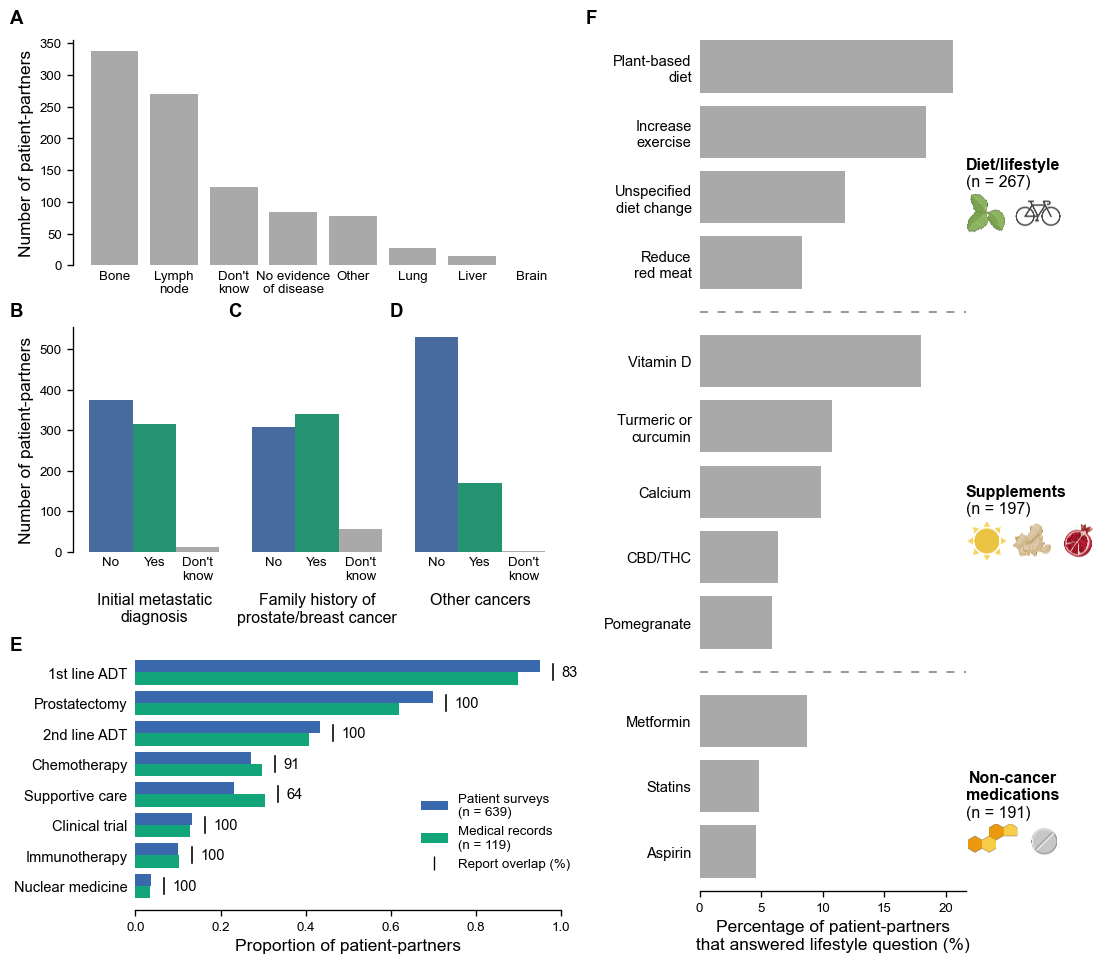

In [15]:
fig2 = plt.figure(figsize=(12, 12))
gs = fig2.add_gridspec(12, 4, width_ratios=[-0.15, 1.6, -0.25, 1], height_ratios = [1]*3 + [0.2] + [1]*3 + [0.8] + [1.1]*3 + [-0.1], wspace = 0.7, hspace = 0.5)

#####################
###### FIG 2A #######
#####################

ax_2a = fig2.add_subplot(gs[:3, :2])
sns.barplot(x = 'Location', y = 'Count', data = plot_data, ax = ax_2a,
            color = 'darkgrey')
sns.despine(ax = ax_2a, bottom = True)
ax_2a.tick_params(axis = 'x', length = 0)
ax_2a.set_xlim([-0.7, None])
ax_2a.set_xlabel('')
ax_2a.set_ylabel('Number of patient-partners')

####################
#### FIG 2B-2D #####
####################

ax_2bd = fig2.add_subplot(gs[4:7, :2])
order = ['INITIAL_ADV_METASTATIC_DIAG', 'FAMILY_MEMBERS_WITH_PC_BC', 'HAD_OTHER_CANCERS']
barplot = sns.barplot(x = 'variable', y = 'count', hue = 'value', data = other_prd_freqs, 
                      ax = ax_2bd, palette = {'No': bold_10[2], 'Yes': bold_10[1], 'Don\'t\nknow': 'darkgrey'}, order = order,
                      hue_order = ['No', 'Yes', 'Don\'t\nknow'])
sns.despine(ax = ax_2bd, bottom = True)

ax_2bd.tick_params(axis = 'x', length = 0)
ax_2bd.set_xlabel('')
ax_2bd.set_ylabel('Number of patient-partners')

new_xticks = [patch.xy[0] + patch.get_width()/2 for patch in barplot.patches]
ax_2bd.set_xticks(new_xticks)
ax_2bd.set_xticklabels(['No']*3 + ['Yes']*3 + ['Don\'t\nknow']*3)

ax_2bd.get_legend().remove()

# add xlabels
for loc, label in zip([0, 1, 2], ['Initial metastatic\ndiagnosis', 'Family history of\nprostate/breast cancer', 'Other cancers']):
    ax_2bd.text(s = label, y = ax_2bd.get_ylim()[1] * -0.18, x = loc, ha = 'center', va = 'top')

#####################
###### FIG 2E #######
#####################

ax_2e = fig2.add_subplot(gs[8:, 1:2])

order = ['1st Line ADT', 'Prostatectomy', '2nd Line ADT', 'Chemotherapy', 'Supportive Care', 'Clinical Trial', 'Immunotherapy', 'Nuclear Medicine']

width = 0.8
spacing = 0.03
prd_locs = [i + width/4 for i in range(8)]
abs_locs = [i - width/4 for i in range(8)]

ax_2e.barh(y = prd_locs, width = therapy_overlap_df['prd_%'][::-1], color = bold_10[2], height = width/2, label = 'Patient surveys\n(n = 639)')
ax_2e.barh(y = abs_locs, width = therapy_overlap_df['abstraction_%'][::-1], color = bold_10[1], height = width/2, label = 'Medical records\n(n = 119)')
ax_2e.set_yticks(range(8))

ax_2e.set_xlabel('Proportion of patient-partners')
ax_2e.set_ylabel('')
ax_2e.set_xlim([0, 1])
sns.despine(left = True, ax = ax_2e)
ax_2e.tick_params(axis = 'y', length = 0)

# add the report overlap values
for i, drug_class in enumerate(order[::-1]):
    loc = np.max([therapy_overlap_df.set_index('Therapy').loc[drug_class, 'prd_%'], therapy_overlap_df.set_index('Therapy').loc[drug_class, 'abstraction_%']])
    ax_2e.plot([loc + spacing, loc + spacing], [i + width/3, i - width/3], color = 'black')
    ax_2e.text(x = loc + spacing + 0.02, y = i, s = '{:.0f}'.format(100*therapy_overlap_df.set_index('Therapy').loc[drug_class, 'report_overlap']), ha = 'left', va = 'center', fontsize = 11)
    
ax_2e.legend(bbox_to_anchor = (1, 0.5), fontsize = 10)
handles, labels = ax_2e.get_legend_handles_labels()
vertical_line = mlines.Line2D([], [], color='black', marker='|', linestyle='None',
                          markersize=10, markeredgewidth=1, label='Vertical line')
ax_2e.set_yticklabels(['1st line ADT', 'Prostatectomy', '2nd line ADT', 'Chemotherapy', 'Supportive care', 'Clinical trial', 'Immunotherapy', 'Nuclear medicine'][::-1], fontsize=11)
ax_2e.tick_params(axis='y', pad=6)
handles.append(vertical_line)
labels.append('Report overlap (%)')
ax_2e.legend(handles, labels, loc = 'center right', bbox_to_anchor = (1.05, 0.3), fontsize = 10)

#####################
###### FIG 2F #######
#####################

ax = fig2.add_subplot(gs[:-1, 3])

ax.barh(y = bar_df['y'], width = bar_df['%_patients'], color = 'darkgrey')

dashed_line_color = mimic_alpha.colorAlpha_to_rgb(['black'], 0.5)[0]
for bp in [2.75, 8.25]:
    ax.axhline(y = bp, color = dashed_line_color, linestyle = (0, (5, 6)))

class_counts = category_counts.set_index('category').loc[['DIET', 'SUPPLEMENTS', 'DRUGS']].values[:, 0]

for i, cat in enumerate([('Diet/lifestyle', 10.5), ('Supplements',  5.5), ('Non-cancer\nmedications', 1)]):
    label = cat[0]
    ax.text(x = ax.get_xlim()[1], y = cat[1], s = label, va = 'center', ha = 'left', multialignment = 'center', weight = 'bold')
    n_label = '\n'*2 if label != 'Non-cancer\nmedications' else '\n'*3
    ax.text(x = ax.get_xlim()[1], y = cat[1], s = n_label + '(n = {})'.format(class_counts[i]), va = 'center', ha = 'left', multialignment = 'center')
    
ax.set_xlabel('Percentage of patient-partners\nthat answered lifestyle question (%)')
ax.set_ylabel('')
sns.despine(left = True, ax = ax)
ax.tick_params(axis='y', length = 0)
ax.set_yticks(bar_df['y'])
ax.set_yticklabels(bar_df['alt_med'], fontsize = 11)
ax.set_ylim([-0.6, 12.4])

ax.tick_params(axis='y', pad=6)

# # add small graphics. Needs to be based on figure coordinates unfortunately
fig_inv_transform = fig2.transFigure.inverted()
ax_transform = ax.transData

# dictionary for adjusting
tweak_dict = {'aspirin': [2.4, 0.5], 'increase exercise': [0.3, 0.7], 'pomegranate': [2.2, 0.52], 'vitamin d': [0, 0.64], 'turmeric': [0.6, 0.6], 'statins': [0, 0.8]}

# default distance from bar and dim of image
defaults = [0, 0.6]

# need to define the conversion from y coordinates to x to make a square axis
aspect_ratio = (ax_transform.transform((0, 1)) - ax_transform.transform((0, 0)))[1]/(ax_transform.transform((1, 0)) - ax_transform.transform((0, 0)))[0]

plotted_cats = {0: ['plant-based', 'increase exercise'], 1: ['vitamin d', 'turmeric', 'pomegranate'], 2: ['statins', 'aspirin']}
for y_index, cats in plotted_cats.items():

    # find where these images are plotted
    y = [10.5, 5.5, 0.9][y_index] - 0.75
    x = ax.get_xlim()[1]
    
    # plot each category
    for i, cat in enumerate(cats):
        
        buffer, size = tweak_dict.get(cat, defaults)
        
        # define coordinates of axis in data coordinates
        bottom_left = (x + buffer, y - size / 2)
        top_right = (x + aspect_ratio * size + buffer, y + size / 2)
        
        y_buffer = 0
    
        # convert to fig coordinates
        bottom_left_fig = fig_inv_transform.transform(ax_transform.transform(bottom_left))
        top_right_fig = fig_inv_transform.transform(ax_transform.transform(top_right))
        left_x, left_y = bottom_left_fig
        width, height = top_right_fig[0] - bottom_left_fig[0], top_right_fig[1] - bottom_left_fig[1]
        image_ax = fig2.add_axes([left_x + width*i, left_y + y_buffer, width, height])
    
        # load the image
        img_path = 'ref/images/{}.png'.format(cat)
        image = mimage.imread(img_path)
        image_ax.imshow(image, interpolation='gaussian')

        image_ax.get_xaxis().set_visible(False)
        image_ax.get_yaxis().set_visible(False)
        sns.despine(left = True, bottom = True, ax = image_ax)
    
# add panel labels
# add panel labels
xcoords = [0.07, 0.07, 0.26, 0.40, 0.07, 0.57]
ycoords = [0.895, 0.64, 0.64, 0.64, 0.35, 0.895]

for label, xcoord, ycoord in zip(['A', 'B', 'C', 'D', 'E', 'F'], xcoords, ycoords):
    fig2.text(s = label, x = xcoord, y = ycoord, transform = fig2.transFigure, weight = 'bold', fontsize = 14)

fig2.savefig('figures/figure2.png', dpi = 300, bbox_inches = 'tight')
fig2.savefig('figures/figure2.svg', bbox_inches = 'tight')
fig2.savefig('figures/figure2.pdf', bbox_inches = 'tight')

## Figure 2 Analyses

The average age at diagnosis analysis cannot be exactly reproduced here, as specific ages of patient-partners are kept confidential for privacy. Likewise, we do not provide full clinical histories publicly, although certain key features are available on cbioPortal. Supplementary Table S2 provides grouped age ranges.

# Figure 3. Donated tumor and cell-free DNA samples obtained through patient partnership recapitulate known genomic findings in metastatic prostate cancer

This figure includes the comutation plot, so it's data preprocessing is more involved. See https://github.com/vanallenlab/comut for package documentation.

In [16]:
####################################
###### Figure 3A - CoMut data ######
####################################

# _T suffix indicates archival sample, _B indicates a blood sample. Samples ordered by mutation frequency
sample_order = pd.read_csv('ref/data/comut_data/sample-order.csv')['sample'].to_list()

# next we load the categorical data - everything except for mutational burden
categorical_data = pd.read_csv('ref/data/comut_data/categorical-data.csv')

# finally, we load the mutational burden
mutation_burden = pd.read_csv('ref/data/comut_data/mutation-burden.csv', dtype = {'value': float})

# next we define various properties about the comut. These will determine its structure and order
# first we define the order of mutations and copy number variants - from the bottom up
mut_order = ['CDK12', 'PTEN', 'KMT2D', 'SPOP', 'TP53']
cna_order = ['BRCA2', 'TP53', 'NKX3-1', 'PTEN', 'MYC', 'AR']

# then we set the relative priority of copy number events - amplifications should 
# always be shown in the upper left triangle, etc
cn_value_order = ['Allelic amplification', 'Allelic deletion', 'aCN = 0', 'Complex', 'CN-LOH', 'Baseline']

# next we define the color mappings for all the comut's data. We'll only define the larger colormaps here -
# others will be as we plot the comut 
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors

mut_mapping = {'Missense': vivid_10[5], 'Nonsense': vivid_10[0], 'In frame indel': vivid_10[1],
               'Frameshift indel': vivid_10[4], 'Splice site': vivid_10[9]}

cna_mapping = {'Baseline': 'white', 'Allelic amplification': balance_6[-2], 'Allelic deletion': balance_6[1],
               'aCN = 0': 'darkgrey', 'CN-LOH': vivid_10[8], 'Complex': vivid_10[2]}

# taken from Meng Xiao He - colormap for gleason score
gleason_cmap = [[0,0,0,0],
                palettable.cartocolors.qualitative.Bold_10.colors[6] + [255 / 4],
                palettable.cartocolors.qualitative.Bold_10.colors[9] + [255 / 2],
                palettable.cartocolors.qualitative.Bold_10.colors[4] + [255 * .75],
                palettable.cartocolors.qualitative.Bold_10.colors[8] + [255],
                palettable.cartocolors.qualitative.Bold_10.colors[0] + [255]]

# pdf doesn't like transparency
for i, color in enumerate(gleason_cmap):
    color = np.array(color)/255
    gleason_cmap[i] = mimic_alpha.colorAlpha_to_rgb(color, color[-1])[0]

gleason_listed_cmap = mcolors.ListedColormap([np.array(x) for x in gleason_cmap])
gleason_mapping = dict(zip(['NR', '6', '7', '8', '9', '10'], np.array(gleason_cmap)))

# finally, we define the structure of the comutation plot. Struture defined from the bottom up
structure = [['Copy number alteration'], ['WGD'], ['Mutation type', 'Purity', 'Gleason score', 'Diagnosis'], 
             ['Mutation burden']]

############################################
##### Figure 3B - Mutation Signatures ######
############################################

# notably, the samples here don't match the sample names used in the comut. But they are still consistent
# e.g. MPC_0062_T1_Saliva == MPCproject_0062_T
mutation_signatures = pd.read_csv('ref/data/mutation-signatures.csv').set_index('sample')

aging_color = mimic_alpha.colorAlpha_to_rgb(['grey'], 0.5)[0]
sig_color_dict = {'1 (Aging)': aging_color, 'Other': 'white', '2/13 (APOBEC)': vivid_10[4],
              '6 (MMR)': vivid_10[0], '3 (HRD)': vivid_10[1]}

############################################
##### Figure 3C - KMT2C Lollipop Plot ######
############################################

kmt2c_data = pd.read_csv('ref/data/kmt2c-lollipop.csv')
lolliplot = lollipop.LollipopPlot(kmt2c_data, 'KMT2C', value_col = 'CCF')

# we hardcode the domains because sometimes lookup from pfam crashes due to server irregularities.
domains = [['zf-HC5HC2H', 252, 331, vivid_10[-2]],
           ['PHD', 388, 438, vivid_10[5]],
           ['PHD', 959, 1057, vivid_10[5]],
           ['zf-HC5HC2H', 4400, 4510, vivid_10[-2]],
           ['FYRN', 4551, 4602, balance_6[1]],
           ['FYRC', 4608, 4692, vivid_10[0]],
           ['SET', 4782, 4887, vivid_10[-1]]]
lolliplot.domains = domains
lolliplot.length = 4911

###########################################
#### Figure 3D/E - Germline Mutations #####
###########################################

groupby_seq = pd.read_csv('ref/data/family-history-germline.csv')
wide_gene_level_data = pd.read_csv('ref/data/germline-hits.csv')

In [17]:
# to create the plot, we first need to create the comut object. We do that in this cell
mpc_comut = comut.CoMut()
mpc_comut.samples = sample_order

# add whole genome doubling
mpc_comut.add_categorical_data(categorical_data.query('category == "WGD"'), 
                               mapping = {'No': 'white', 'Yes':'darkgrey'}, name = 'WGD')

# add copy number
mpc_comut.add_categorical_data(categorical_data[categorical_data['value'].isin(cna_mapping.keys())], 
                               category_order = cna_order, tick_style = 'italic', 
                               mapping = cna_mapping, value_order = cn_value_order, name = 'Copy number alteration')

# add mutations
mpc_comut.add_categorical_data(categorical_data[categorical_data['value'].isin(mut_mapping.keys())], 
                               category_order = mut_order, tick_style = 'italic', 
                               mapping = mut_mapping, name = 'Mutation type')

# add purity - have to take extra care to make data types correct
purity_data = categorical_data.query('category == "Purity"').copy()
purity_data['value'] = purity_data['value'].astype(float)
mpc_comut.add_continuous_data(purity_data,
                              mapping = palettable.cartocolors.sequential.Purp_7.mpl_colormap, 
                              name = 'Purity')

# add gleason
mpc_comut.add_categorical_data(categorical_data.query('category == "Gleason"'), 
                               mapping = gleason_mapping, name = 'Gleason score')

# add initial diagnosis
mpc_comut.add_categorical_data(categorical_data.query('category == "Diagnosis"'), 
                               mapping = {'Metastatic': 'darkgrey', 'Localized':'white'}, name = 'Diagnosis')

# add mutation burden
mpc_comut.add_bar_data(mutation_burden, mapping = {'value': 'darkgrey'}, name = 'Mutation burden', 
                       ylabel = 'muts/Mb')

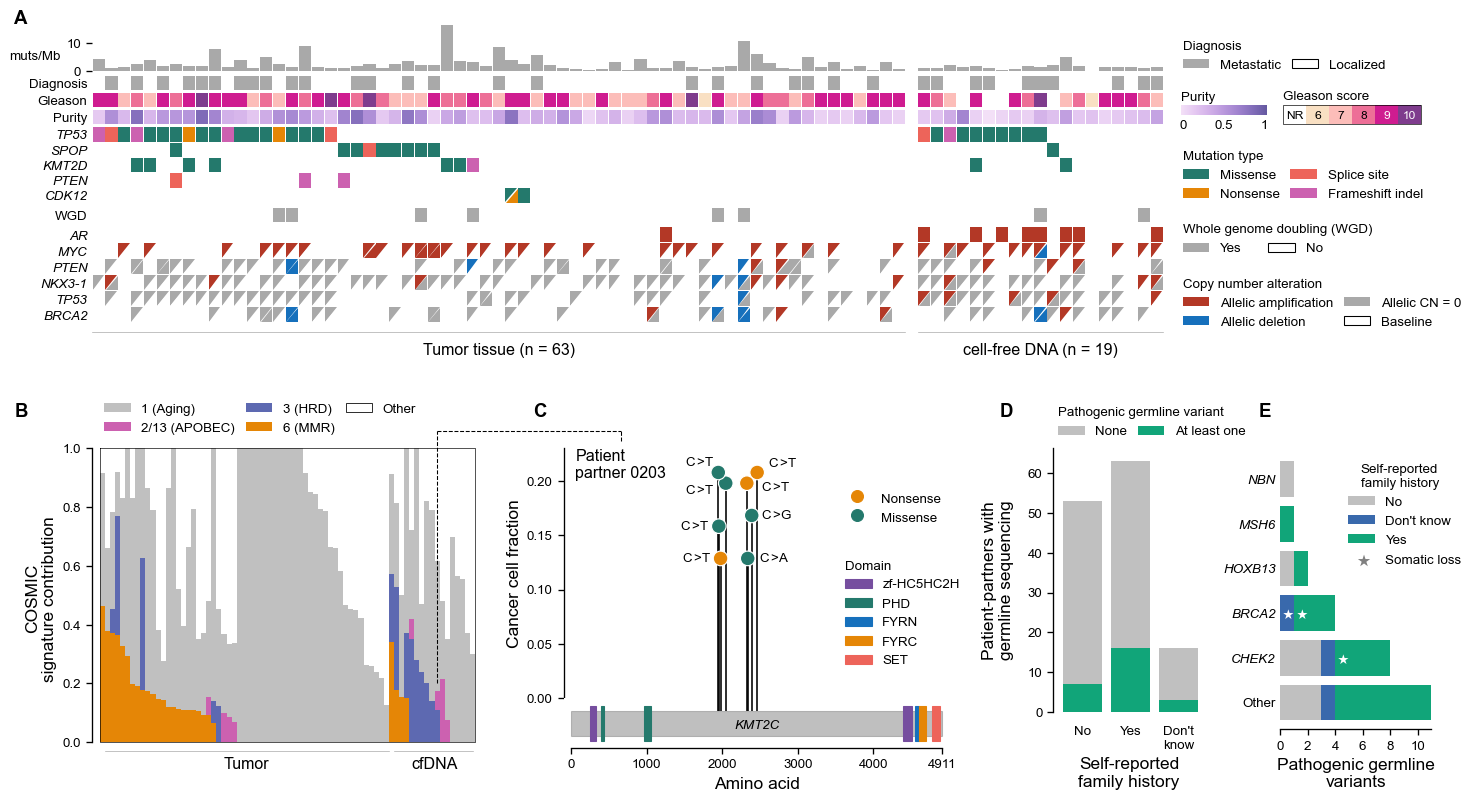

In [18]:
# create the figure
fig3 = plt.figure(figsize=(18, 10), tight_layout=False)

# define the gridspec, adding some spacer axes
gs = fig3.add_gridspec(2, 16, width_ratios=[1]*5 + [0] + [1]*10, height_ratios = [1,1], wspace = 1.8, hspace = 0.42)

# inverse transform needed for plotting lines later
fig3_inv_transform = fig3.transFigure.inverted()

#############################
###### FIG 3A - CoMut #######
#############################

# plot the comut
mpc_comut.plot_comut(figsize = (18,3.8), x_padding = 0.03, y_padding = 0.03, 
                     tri_padding = 0.03, hspace = 0.05, structure = structure, subplot_hspace = 0.06, 
                     fig = fig3, spec=gs[0, :13])

# Adding the legends is tedious. While CoMut's default legend is fine, matplotlib tends to exceed
# figure boundaries with default legends. To avoid this, we adjust the legends manually

# we create legends within their own gridspec, to the right of the comut
fig3a_legends = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs[0, 13:15], wspace = 0)
fig3a_diag_ax = fig3.add_subplot(fig3a_legends[0])
fig3a_mut_ax = fig3.add_subplot(fig3a_legends[1])
fig3a_wgd_ax = fig3.add_subplot(fig3a_legends[2])
fig3a_cna_ax = fig3.add_subplot(fig3a_legends[3])

# mutation legend - add the legend, extract the handles and labels, then remove it and add the legend to its own axis
mut_leg_order = ['Missense', 'Nonsense', 'Splice site', 'Frameshift indel']
plt.rcParams['legend.title_fontsize'] = 10
mut_leg = mpc_comut.add_axis_legend('Mutation type', order = mut_leg_order)
handles, labels = mpc_comut.axes['Mutation type'].get_legend_handles_labels()
new_legend_dict = dict(zip(labels, handles))
mut_leg.remove()

new_legend_dict = {label: handle for label, handle in new_legend_dict.items() if label != 'Absent'}
mut_leg = fig3a_mut_ax.legend(handles = new_legend_dict.values(), labels = new_legend_dict.keys(), frameon = False, 
                              title = 'Mutation type', fontsize = 10, ncol = 2, loc = 'center left', 
                              bbox_to_anchor = (-0.4, -0.14), columnspacing = 0.8)
mut_leg._legend_box.align = "left"
sns.despine(ax = fig3a_mut_ax, bottom = True, left = True)
fig3a_mut_ax.get_xaxis().set_visible(False)
fig3a_mut_ax.get_yaxis().set_visible(False)

# repeat this legend making process process for cna legend
cna_leg_order = ['Allelic amplification', 'Allelic deletion', 'Allelic CN = 0', 'Baseline']
cna_leg = mpc_comut.add_axis_legend('Copy number alteration', loc = 'center left', border_white = ['Baseline'], 
                                    rename = {'aCN = 0': 'Allelic CN = 0'}, order = cna_leg_order)
handles, labels = mpc_comut.axes['Copy number alteration'].get_legend_handles_labels()
new_legend_dict = dict(zip(labels, handles))
cna_leg.remove()

# alter the legend to do some slight rewordings and formatting quirks
new_legend_dict['Allelic CN = 0'] = new_legend_dict.pop('aCN = 0')
new_legend_dict['Baseline'].set_ec('black')
new_legend_dict = {label: new_legend_dict[label] for label in cna_leg_order}
cna_leg = fig3a_cna_ax.legend(handles = new_legend_dict.values(), labels = new_legend_dict.keys(), frameon = False, 
                    title = 'Copy number alteration', fontsize = 10, ncol = 2, loc = 'center left', bbox_to_anchor = (-0.4, 0.3),
                    columnspacing = 0.8)
cna_leg._legend_box.align = "left"
sns.despine(ax = fig3a_cna_ax, bottom = True, left = True)
fig3a_cna_ax.get_xaxis().set_visible(False)
fig3a_cna_ax.get_yaxis().set_visible(False)

# repeat this figure making process for the wgd legend
wgd_leg = mpc_comut.add_axis_legend(name = 'WGD', title = 'Whole genome\nduplication (WGD)', border_white = ['No'],
                                    order = ['Yes', 'No'])
handles, labels = mpc_comut.axes['WGD'].get_legend_handles_labels()
new_legend_dict = dict(zip(labels, handles))
wgd_leg.remove()

new_legend_dict = {label: new_legend_dict[label] for label in ['Yes', 'No']}
new_legend_dict['No'].set_ec('black')
wgd_leg = fig3a_wgd_ax.legend(handles = new_legend_dict.values(), labels = new_legend_dict.keys(), frameon = False, 
                    title = 'Whole genome doubling (WGD)', fontsize = 10, ncol = 2, loc = 'center left', bbox_to_anchor = (-0.4, 0.08))
wgd_leg._legend_box.align = "left"
sns.despine(ax = fig3a_wgd_ax, bottom = True, left = True)
fig3a_wgd_ax.get_xaxis().set_visible(False)
fig3a_wgd_ax.get_yaxis().set_visible(False)
fig3a_wgd_ax.patch.set_alpha(0)

# repeat this legend making process for initial diagnosis
diag_leg = mpc_comut.add_axis_legend(name = 'Diagnosis', title = 'Diagnosis', border_white = ['Localized'],
                                    order = ['Metastatic', 'Localized'])
handles, labels = mpc_comut.axes['Diagnosis'].get_legend_handles_labels()
new_legend_dict = dict(zip(labels, handles))
diag_leg.remove()

new_legend_dict = {label: new_legend_dict[label] for label in ['Metastatic', 'Localized']}
new_legend_dict['Localized'].set_ec('black')
diag_leg = fig3a_diag_ax.legend(handles = new_legend_dict.values(), labels = new_legend_dict.keys(), frameon = False, 
                                title = 'Diagnosis', fontsize = 10, ncol = 2, loc = 'center left', 
                                bbox_to_anchor = (-0.4, 0.5), columnspacing = 0.8)
diag_leg._legend_box.align = "left"
sns.despine(ax = fig3a_diag_ax, bottom = True, left = True)
fig3a_diag_ax.get_xaxis().set_visible(False)
fig3a_diag_ax.get_yaxis().set_visible(False)
fig3a_diag_ax.patch.set_alpha(0)

# remove xticks from the comut
mpc_comut.axes['Copy number alteration'].set_xticklabels([])
mpc_comut.axes['Mutation burden'].set_ylabel('muts/Mb', fontsize = 10, rotation = None, 
                                             y = 0.3, x = -0.1, va = 'center', ha = 'right')

# add grey lines to delineate tumor from cfDNA - have to transform to figure coordinates. First, identify the line locations within the comut
left_ffpe, bottom = fig3_inv_transform.transform(mpc_comut.axes['Copy number alteration'].transData.transform((0, 0)))
right_ffpe, bottom = fig3_inv_transform.transform(mpc_comut.axes['Copy number alteration'].transData.transform((63, 0)))
left_blood, bottom = fig3_inv_transform.transform(mpc_comut.axes['Copy number alteration'].transData.transform((64, 0)))
right_blood, bottom = fig3_inv_transform.transform(mpc_comut.axes['Copy number alteration'].transData.transform((83, 0)))

# slightly move the lines below the comut
line_color = mimic_alpha.colorAlpha_to_rgb(['grey'], 0.7)[0]
bottom = bottom - 0.01
l1 = mlines.Line2D([left_ffpe, right_ffpe], [bottom, bottom], color = line_color, linewidth = 0.5,
                   transform=mpc_comut.figure.transFigure, figure=mpc_comut.figure)
l2 = mlines.Line2D([left_blood, right_blood], [bottom, bottom], color = line_color, linewidth = 0.5,
                   transform=mpc_comut.figure.transFigure, figure=mpc_comut.figure)
mpc_comut.figure.lines.extend([l1, l2])

# add purity color bar. Make it line up with mutation axis
left_top_mut_leg = fig3_inv_transform.transform(fig3a_mut_ax.transData.transform((-0.4, 0.5)))
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap
purity_ax = mpc_comut.figure.add_axes([left_top_mut_leg[0] + 0.006, left_top_mut_leg[1] + 0.02, 0.05, 0.010])
norm = mcolors.Normalize(vmin=0, vmax=1)
purity_colorbar = mpc_comut.figure.colorbar(cm.ScalarMappable(norm=norm, cmap=purp_7),
                                            cax=purity_ax, orientation='horizontal')
purity_colorbar.ax.tick_params(size=0)
purity_colorbar.set_ticks([0.03,0.5,0.97])
purity_colorbar.set_ticklabels([0,0.5,1])
purity_colorbar.outline.set_visible(False)

# set title of colorbar to line up with other legend elements
purity_colorbar.set_label('Purity', labelpad = -30, x = 0.2, fontsize = 10)

# add the gleason colorbar
gleason_ax = mpc_comut.figure.add_axes([left_top_mut_leg[0] + 0.065, left_top_mut_leg[1] + 0.01, 0.08, 0.020])
bounds = 4.5 + np.arange(7)
cb = colorbar.ColorbarBase(gleason_ax,
                           cmap=gleason_listed_cmap,
                           norm=mcolors.BoundaryNorm(bounds, gleason_listed_cmap.N),
                           boundaries=bounds,
                           ticks=[5, 6, 7, 8, 9, 10],
                           orientation='horizontal')
cb.outline.set_linewidth(0.5)
cb.ax.tick_params(axis='both', direction='in', length=0, pad=-10, labelsize = 9)
cb.set_ticks(bounds[:-1] + 0.5)
cb.ax.set_xticklabels(['NR', '6', '7', '8', '9', '10'], ha = 'center')
cb.set_label('Gleason score', x = 0, va = 'bottom', ha = 'left', fontsize = 10, labelpad = -16)

# make the text in the darker color squares white
for tl in cb.ax.get_xticklabels()[-2:]:
    tl.set_color('white')

# add labels to comut samples
mpc_comut.axes['Copy number alteration'].text(s = 'Tumor tissue (n = 63)', x = 31.5, y = -2, 
                                                ha = 'center', fontsize = 12)
mpc_comut.axes['Copy number alteration'].text(s = 'cell-free DNA (n = 19)', x = 73.5, y = -2, 
                                                ha = 'center', fontsize = 12)

# I dont fully understand why this happens, but we have to remove a patch that is bordered - its always the first one. 
# This is likely a bug within comut
mpc_comut.axes['Copy number alteration'].patches[0].remove()
mpc_comut.axes['Copy number alteration'].patches[0].remove()
mpc_comut.axes['WGD'].patches[0].remove()
mpc_comut.axes['Diagnosis'].patches[0].remove()

#############################################
###### FIG 3B - Mutational Signatures #######
#############################################

# the entire "bottom" row of Figure 3 gets its own gridspec, as the spacing needs to be 
# different than the comut and its legend axes
fig3bcde = gridspec.GridSpecFromSubplotSpec(1, 16, subplot_spec = gs[1, :], width_ratios = [1]*4 + [0] + [0.8]*6 + [1]*5, 
                                            wspace = 0.1)

# now we had the mutation signatures
sig_ax = fig3.add_subplot(fig3bcde[:5])

# plot the bars individually - matplotlib doesn't have a super great built in way to do stacked bar charts
for i, column in enumerate(mutation_signatures.columns[:-2]):
    bottom = [0]*len(mutation_signatures) if i == 0 else mutation_signatures.iloc[:, :-2].cumsum(axis = 1).iloc[:, i-1]
    sig_bars = sig_ax.bar(x = mutation_signatures.index,  height = mutation_signatures[column], bottom = bottom, 
                          label = column, width = 1, color = sig_color_dict.get(column))

# add a border around the axis
left, right = sig_bars[0].xy[0], sig_bars[-1].xy[0]+1
sig_ax.plot([left, right, right, left, left], [1,1,0,0,1], color = 'black', linewidth = 0.5)

# format this axis a bit
sns.despine(bottom = True, ax = sig_ax)
sig_ax.set_xticklabels('')
sig_ax.set_xlim(-2, 74)
sig_ax.set_ylim(-0.02, 1)
sig_ax.spines['left'].set_bounds(0, 1)
sig_ax.tick_params(axis = 'x', length = 0)
sig_ax.set_ylabel('COSMIC\nsignature contribution')

# now we add the legend. Put it at the top with three columns
sig_ax.legend(bbox_to_anchor = (1, 0.5))
handles, labels = sig_ax.get_legend_handles_labels()
handles = handles[:-1] + [mpatches.Rectangle((0,0), 1, 1, facecolor = 'white', edgecolor = 'black', linewidth = 0.6)]
legend_dict = dict(zip(labels, handles))
order = ['1 (Aging)', '2/13 (APOBEC)', '3 (HRD)', '6 (MMR)', 'Other']
sig_ax.legend([legend_dict[sig] for sig in order], order, bbox_to_anchor = (0, 1.1), fontsize = 10, ncol = 3, 
              columnspacing = 0.8)

# add primary and blood biopsy labels, adding some lines
left, bottom = fig3_inv_transform.transform(sig_ax.transData.transform((0.5, -0.03)))
right, bottom = fig3_inv_transform.transform(sig_ax.transData.transform((len(mutation_signatures) - 1,  -0.03)))
break_index = 57
left_bp, bottom = fig3_inv_transform.transform(sig_ax.transData.transform((break_index - 0.5, -0.03)))
right_bp, bottom = fig3_inv_transform.transform(sig_ax.transData.transform((break_index + 0.5,  -0.03)))

l_ffpe = mlines.Line2D([left, left_bp], [bottom, bottom], color = line_color, linewidth = 0.5,
                   transform=mpc_comut.figure.transFigure, figure=mpc_comut.figure)
l_blood = mlines.Line2D([right_bp, right], [bottom, bottom], color = line_color, linewidth = 0.5,
                   transform=mpc_comut.figure.transFigure, figure=mpc_comut.figure)
mpc_comut.figure.lines.extend([l_ffpe, l_blood])
sig_ax.text(s = 'Tumor', x = 28.5, y = -0.05, ha = 'center', va = 'top', fontsize = 12)
sig_ax.text(s = 'cfDNA', x = 65.5, y = -0.05, ha = 'center', va = 'top', fontsize = 12)

################################
###### FIG 3C - Kataegis #######
################################

# first, plot the lollipop plot using the custom script
_, (mut_ax, gene_ax) = lolliplot.plot_lollipop(fig = fig3, spec = fig3bcde[6:11], ylim = [0, 0.23], 
                                               palette = {'Missense': vivid_10[5], 'Nonsense': vivid_10[0]})
mut_ax.get_xaxis().set_visible(False)

pt_label = mut_ax.text(s = 'Patient\npartner 0203', x = 0.03, y = 1, ha = 'left', va = 'top', 
                       transform = mut_ax.transAxes)

# add legends
handles, labels = mut_ax.get_legend_handles_labels()
mut_ax.get_legend().remove()
mut_leg = mut_ax.legend(handles=handles, labels=labels, 
                        loc = 'upper right', bbox_to_anchor = (1.01,0.88), fontsize = 10)
plt.setp(mut_leg.get_texts(), va='center')
for handle in mut_leg.legendHandles:
    handle._sizes = [80]

# add C > T info. Labels are added at constant distance from points at certain angles. 
# Manually adjusted
angles = [120, 180, 180, -120, -20, 0, 0, 20]
radii = [0.02, 0.025, 0.025, 0.06, 0.040, 0.030, 0.025, 0.03]
context_data = kmt2c_data[['Location', 'CCF', 'Reference_Allele', 'Tumor_Seq_Allele2']].replace({'G': 'C', 'A': 'T', 'C': 'G', 'T': 'A'}) \
                                                                                           .sort_values(by = 'Location').reset_index(drop = True)
# add the labels, given the angles and radii
for index, row in context_data.iterrows():
    sub = '{}'.format(row['Reference_Allele']) + r'$\,$' + '>{}'.format(row['Tumor_Seq_Allele2'])
    ha = 'right' if index < 4 else 'left'
    va = 'bottom' if index in [0, 3, 7] else 'center'
    angle, r = np.deg2rad(angles[index]), radii[index]
    x_off, y_off = r*np.cos(angle)*mut_ax.get_xlim()[1], r*np.sin(angle)*mut_ax.get_ylim()[1]
    mut_ax.text(x = row['Location'] + x_off, y = row['CCF'] + y_off, s = sub, 
                fontsize = 10, va = va, ha = ha)
    
# add KMT2C label
gene_ax.text(x = 4911/2, y = 0.45, s = 'KMT2C', fontsize = 10, ha = 'center', va = 'center', fontstyle = 'italic')
mut_ax.set_ylabel('Cancer cell fraction')

### Connect patient-partner in mutsig data with KMT2C ###
plt.draw(); # have to draw to render the patient-partner label

# find patient position in sig data and convert to figure coordinates
bar_index = list(mutation_signatures.index).index('MPC_0203_BLOOD_P_BLOOD_BC')
x_pos = sig_bars.patches[bar_index].xy[0] + 0.5
sig_data_point = (x_pos, 1.06)
left_fig_point = fig3_inv_transform.transform(sig_ax.transData.transform(sig_data_point))

# identify the location of the Patient-partner 0203 label in the KMT2C plot
pt_label_point = (np.mean(pt_label.get_window_extent().intervalx), pt_label.get_window_extent().get_points()[1][1])
mut_ax_pt_label_point = mut_ax.transAxes.inverted().transform(pt_label_point)
pt_label_point_fig = fig3_inv_transform.transform(pt_label_point)

# identify y points of data associated with MPC_0203 in the signature data
spacing = 0.008
ybar = (x_pos, mutation_signatures.loc['MPC_0203_BLOOD_P_BLOOD_BC'][:-2].cumsum().loc['2/13 (APOBEC)'])
ybar_pt = fig3_inv_transform.transform(sig_ax.transData.transform(ybar))

# draw the lines on the figure
l3 = mlines.Line2D([left_fig_point[0], pt_label_point_fig[0]], [left_fig_point[1], left_fig_point[1]], linestyle = 'dashed', color = 'black',
                   linewidth = 0.8, transform=fig3.transFigure, figure=fig3)
l4 = mlines.Line2D([left_fig_point[0], left_fig_point[0]], [ybar_pt[1] + spacing, left_fig_point[1]], linestyle = 'dashed', color = 'black',
                   linewidth = 0.8, transform=fig3.transFigure, figure=fig3)
l5 = mlines.Line2D([pt_label_point_fig[0], pt_label_point_fig[0]], [pt_label_point_fig[1] + spacing, left_fig_point[1]], linestyle = 'dashed', color = 'black',
                   linewidth = 0.8, transform=fig3.transFigure, figure=fig3)
fig3.lines.extend([l3, l4, l5])

# add the arrow
mut_ax.arrow(x = mut_ax_pt_label_point[0], y = mut_ax_pt_label_point[1] + 0.05, dx = 0, dy = -0.0001, length_includes_head=False, 
             head_width = 0.015, head_length = 0.04, color = 'black',
             transform = mut_ax.transAxes)

# add the gene axis legend here. Required because we need to create an axis object to
# store the legend and it must be created after 2B is created, for some odd matplotlib reason
handles, labels = gene_ax.get_legend_handles_labels()
new_gene_legend_dict = dict(zip(labels, handles))
gene_ax.get_legend().remove()
gene_ax.set_xlabel('Amino acid')

gene_legend_ax = fig3.add_axes([0.55, 0.2, 0.08, 0.13])
gene_legend = gene_legend_ax.legend(handles = new_gene_legend_dict.values(), labels = new_gene_legend_dict.keys(), ncol = 1, 
                                    loc = 'center right', bbox_to_anchor = (1.05, 0.5), title = 'Domain', fontsize = 10)
gene_legend._legend_box.align = "left"
sns.despine(bottom = True, left = True, ax = gene_legend_ax)
gene_legend_ax.get_xaxis().set_visible(False)
gene_legend_ax.get_yaxis().set_visible(False)

#########################################
###### FIG 3D - Germline variants #######
#########################################

# figures d and e gets their own gridspec, as the spacing between d and e needs to be quite small
fig3de = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = fig3bcde[12:], width_ratios = [1,1], wspace = 0.5)
fig3d = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = fig3de[0], height_ratios = [1, 0.033])
ax_3d = fig3.add_subplot(fig3d[0])

# add the patient reported data and overlap with histories
ax_3d.bar(x = ['No', 'Yes', 'Don\'t\nknow'], height = groupby_seq[~groupby_seq['germline_alt']]['count'], bottom = groupby_seq.query('germline_alt')['count'], 
       color = aging_color, label = 'None')
ax_3d.bar(x = ['No', 'Yes', 'Don\'t\nknow'], height = groupby_seq.query('germline_alt')['count'], color = palettable.cartocolors.qualitative.Bold_10.mpl_colors[1],
       label = 'At least one')

# adjust the axis
ax_3d.tick_params(axis = 'x', length = 0, pad = 10)
ax_3d.set_xlim([-0.6, None])
ax_3d.set_xlabel('Self-reported\nfamily history')
ax_3d.set_ylabel('Patient-partners with\ngermline sequencing', labelpad = 10)

sns.despine(bottom = True, ax = ax_3d)
germline_leg = ax_3d.legend(bbox_to_anchor = (-0.05, 1.1), fontsize = 10, ncol = 2, title = 'Pathogenic germline variant', columnspacing = 0.8)
germline_leg._legend_box.align = "left"

######################################
###### FIG 3E - Specific genes #######
######################################

fig3e = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = fig3de[1], height_ratios = [1, -0.03])
ax_3e = fig3.add_subplot(fig3e[0])

ax_3e.barh(y = wide_gene_level_data['gene'], width = wide_gene_level_data['No'], color = aging_color,
       label = 'No')
ax_3e.barh(y = wide_gene_level_data['gene'], width = wide_gene_level_data['Don\'t know'], color = palettable.cartocolors.qualitative.Bold_10.mpl_colors[2],
       label = 'Don\'t know', left = wide_gene_level_data['No'])
ax_3e.barh(y = wide_gene_level_data['gene'], width = wide_gene_level_data['Yes'], color = palettable.cartocolors.qualitative.Bold_10.mpl_colors[1],
       label = 'Yes', left = wide_gene_level_data['No'] + wide_gene_level_data['Don\'t know'])
ax_3e.set_ylim([-0.6, None])
ax_3e.set_xlim([0, 11])
ax_3e.set_xticks([0, 2, 4, 6, 8, 10])

# draw everything, then reposition labels and legend
plt.draw()
yticklabels = ax_3e.get_yticklabels()
for label in yticklabels:
    if label.get_text() != 'Other':
        label.set_fontstyle('italic')
ax_3e.tick_params(axis = 'y', length = 0)
ax_3e.set_xlabel('Pathogenic germline\nvariants')
sns.despine(ax = ax_3e, left = True)
ax_3e.legend(bbox_to_anchor = (0.37, 0.8), fontsize = 10, title = 'Self-reported\nfamily history')

# add information about double hits
for (x, y) in [(0.5, 1.96), (1.5, 1.96), (4.5, 0.96)]:
    ax_3e.text(s=r'$\star$', x=x, y=y, color='white', fontsize=20, ha='center', va='center')

ax_3e.text(5.95, 3.18, s = r'$\star$', fontsize = 24, va = 'center', ha = 'center', 
           color='gray', fontweight='bold')
ax_3e.text(7.65, 3.18, s = 'Somatic loss', fontsize = 10, va = 'center')

#### Add panel labels #####
xcoords = [0.08, 0.08, 0.38, 0.65, 0.8]
ycoords = [0.88, 0.47, 0.47, 0.47, 0.47]

for label, xcoord, ycoord in zip(['A', 'B', 'C', 'D', 'E'], xcoords, ycoords):
    fig3.text(s = label, x = xcoord, y = ycoord, transform = fig3.transFigure, weight = 'bold', fontsize = 14)
    
fig3.savefig('figures/figure3.png', dpi = 300, bbox_inches = 'tight')
fig3.savefig('figures/figure3.svg', bbox_inches = 'tight')
fig3.savefig('figures/figure3.pdf', bbox_inches = 'tight')

## Figure 3 Analyses
 
Some of these results cannot be reproduced without confidental data (e.g. the specific location of germline mutations, patient-partner level of self-reported family history and pathogenic germline status, etc)

In [19]:
# TP53 and SPOP are recurrently altered
mutsig_results = pd.read_csv('ref/data/mutsig_sig_genes.txt', sep = '\t')

In [20]:
mutsig_results[mutsig_results['gene'].isin(['TP53', 'SPOP'])]

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
0,1,TP53,tumor protein p53,1900,17,0,0,20,2,1,5,28,28,25,5.242170e-16,0.09478,0.00001,1.000000e-16,4.593500e-13
4,5,SPOP,speckle-type POZ protein,1161,25,0,0,9,0,1,0,10,10,7,1.140496e-11,0.00012,0.03725,6.372680e-14,2.341833e-10


In [21]:
# samples from patient-partners with metastatic diagnoses are more likely to carry TP53 mutations
mutation_data = pd.read_csv('ref/data/supplementary_data/supplementary-data-3.csv')
mutation_data.head(2)

,Sample,Hugo_Symbol,Entrez_Gene_Id,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Alt_Allele,Codon_Change,Tumor_Ref_Count,Tumor_Alt_Count,Normal_Ref_Count,Normal_Alt_Count
0,RP-1532_PCProject_0013_T1_v2_Exome_OnPrem,PUSL1,126789,1,1244609,1244609,Silent,SNP,C,G,c.(277-279)gtC>gtG,17,88,0.0,63.0
1,RP-1532_PCProject_0013_T1_v2_Exome_OnPrem,RBP7,116362,1,10067027,10067027,Intron,SNP,T,C,NaN,11,278,0.0,81.0


In [22]:
# extract the diagnosis data
diagnosis_data = categorical_data[categorical_data['category'] == 'Diagnosis'].copy()
diagnosis_data.head(2)

,sample,category,value
1202,MPCproject_0031_T,Diagnosis,Localized
1203,MPCproject_0213_T,Diagnosis,Metastatic


In [23]:
# the naming scheme for the mutation data and categorical data differ slightly but are consistent.
# the sample name in diagnosis_data is MPCproject_0031_T, whereas the corresponding sample name in the mutation data
# is RP-1532_PCProject_0031_T1_v2_Exome_OnPrem. XXXX_N where X are numbers and N is T or B (for tumor or blood) is specific.
mutation_sample_names = []
for s in diagnosis_data['sample']:
    sample_name = '_'.join(s.split('_')[1:])
    matching_mutation_sample_names = [s for s in mutation_data['Sample'].unique() if sample_name in s]
    assert len(matching_mutation_sample_names) == 1
    mutation_sample_names.append(matching_mutation_sample_names[0])
    
diagnosis_data['mutation_data_name'] = mutation_sample_names

In [24]:
# primary tumors from patients diagnosed with metastatic disease are more likely to have TP53 mutations
tp53_mut_data = mutation_data[mutation_data['Hugo_Symbol'] == 'TP53'].copy()
diagnosis_data['TP53_mut'] = diagnosis_data['mutation_data_name'].apply(lambda name: name in tp53_mut_data['Sample'].to_list())

# subset to primary tumor samples
diagnosis_data_tumors = diagnosis_data[diagnosis_data['sample'].str.contains('_T')]
cont_table = diagnosis_data_tumors.groupby(['value', 'TP53_mut']).size()
scipy.stats.fisher_exact(cont_table.values.reshape((2,2)))

(3.7472527472527473, 0.04248216714906858)

In [25]:
# mutation frequency of TP53 in primary tumors of this cohort
sum(diagnosis_data_tumors['TP53_mut']) / len(diagnosis_data_tumors)

0.2903225806451613

In [26]:
# gistic analyses
gistic_amp_results = pd.read_csv('ref/data/copy_number_data/gistic_amp_genes.txt', sep = '\t', header = None)
gistic_del_results = pd.read_csv('ref/data/copy_number_data/gistic_del_genes.txt', sep = '\t', header = None)

# reformat the GISTIC results
gistic_amp_results = figures.clean_gistic_file(gistic_amp_results, 'amp')
gistic_del_results = figures.clean_gistic_file(gistic_del_results, 'del')

In [27]:
# AR, FOXA1, PTEN recurrent copy number alteration
gistic_del_results[gistic_del_results['genes_in_region'].str.contains('PTEN')]

,chromosome,peak_start,peak_end,n_genes_in_region,genes_in_region,cytoband,q_value,residual_q_value,amp
15,10,89259099,90440743,11,"MINPP1,ATAD1,PTEN,LIPF,RNLS,PAPSS2,SNORD74|ENS...",10q23.31,1.8711e-08,3.7453e-05,0


Next, we examine the mutation signature results

In [28]:
mut_signatures = pd.read_csv('ref/data/mutation-signatures.csv')
mut_signatures.head(2)

,sample,6 (MMR),3 (HRD),2/13 (APOBEC),1 (Aging),Other,pair_type,metastatic-associated
0,MPC_0056_T1_SALIVA,0.463920,0.0,0.0,0.451825,0.084255,archival,1.0
1,MPC_0439_T2_SALIVA,0.379401,0.0,0.0,0.280888,0.339711,archival,0.0


In [29]:
# samples with signature 3 are more likely to be metastatis-associated (primary tumors in the setting of metastatic diagnosis
# or cfDNA tumors)
mut_signatures['Sig 3 Presence'] = mut_signatures['3 (HRD)'] > 0
cont_table = mut_signatures.groupby(['Sig 3 Presence', 'metastatic-associated']).size()
scipy.stats.fisher_exact(cont_table.values.reshape(2,2))

(4.059523809523809, 0.042120492094633186)

The association between signature 3 and BRCA1/2 alterations or DNA repair pathway alterations cannot be reproduced here, as these alterations can include germline pathogenic variants. Sample-level germline alterations are not reported to protect privacy (even if the gene is not specified).

# Figure 4. cfDNA from donated blood reveals patterns of clonal dynamics and clinically relevant genomic changes

__Note__: All dates and times shown in this figure are relative to the patient-partner's prostate cancer diagnosis date, as determined by their abstracted medical records. For the purpose of figure making, this date is arbitrarily set to Jan 1, 2000. This is not their true dates of diagnoses and was done to protect the privacy of our patient-partners.

In [30]:
#### Figure 4a - clinical history of patient-partner 0495 ####

# therapy data
pt_prtner_0495_clinical = pd.read_csv('ref/data/patient-partner-0495-clinical-history.csv', parse_dates = ['RELATIVE START DATE', 'RELATIVE STOP DATE'])

# event data
pt_0495_events = {'Primary\ndiagnosis': datetime.datetime(2000, 1, 1, 0, 0),
         'Metastatic\ndiagnosis': datetime.datetime(2001, 10, 24, 0, 0),
         'Joined\nMPCproject': datetime.datetime(2006, 2, 17, 0, 0),
         'Donated\nblood': datetime.datetime(2006, 5, 25, 0, 0)}

patch_height = 0.7
color_dict = {'1st Line ADT': aging_color, 'Chemotherapy': bold_10[1], 'Clinical Trial': bold_10[6],
              'Radium-223 radiotherapy': bold_10[5], r'TGF-$\beta$ inhibitor': bold_10[0],
              'Abiraterone': bold_10[2], 'Enzalutamide': bold_10[4], 'EBRT': bold_10[3]}

pt_prtner_0495_psa = pd.read_csv('ref/data/patient-partner-0495-psa-history.csv', parse_dates = ['RELATIVE PSA DATE'])
pt_prtner_0495_psa.head()

#### Figure 4b ####

# read in phylogic data. The cluster_ccf file contains the ccf of the clusters between timepoints. The
# mut_ccf is used to determine how many mutations are in each cluster
pt_prtner_0495_mut_ccf = pd.read_csv('ref/data/phylogic_data/RP-1532_PCProject_0495.mut_ccfs.txt', sep = '\t')
pt_prtner_0495_cluster_ccf = pd.read_csv('ref/data/phylogic_data/RP-1532_PCProject_0495.cluster_ccfs.txt', sep = '\t')
pt_prtner_0093_mut_ccf = pd.read_csv('ref/data/phylogic_data/RP-1532_PCProject_0093.mut_ccfs.txt', sep = '\t')
pt_prtner_0093_cluster_ccf = pd.read_csv('ref/data/phylogic_data/RP-1532_PCProject_0093.cluster_ccfs.txt', sep = '\t')

#### Figure 4c ####

# location of AR based on gencode30 GChr37 liftover
ar_chrom, ar_start, ar_end = ('X', 66763874, 66950461)

# A number of data needs to be loaded in. For each copy number plot, we need the coverage data as well as the segmentation data
# We standardize the column names as well.
ffpe_coverage = pd.read_csv('ref/data/copy_number_data/MPC_0093_T2_BC.tn.tsv', sep = '\t', comment = '#', low_memory = False,
                            names = ['chrom', 'start', 'end', 'name', 'logR'], header = 0, dtype = {'start': int, 'end': int})
ffpe_segmentation = pd.read_csv('ref/data/copy_number_data/MPC_0093_T2_BC.seg', sep = '\t', comment = '#', low_memory = False,
                                names = ['sample', 'chrom', 'start', 'end', 'num_probes', 'logR'], header = 0, dtype = {'start': int, 'end': int})
blood_ulp_coverage = pd.read_csv('ref/data/copy_number_data/RP-1532_PCProject_0093_BLOOD_P_v1_WGS_OnPrem.cna.seg', sep = '\t', comment = '#', low_memory = False,
                                 names = ['chrom', 'start', 'end', 'copy.number', 'event', 'logR', 'subclone.status'], header = 0, dtype = {'start': int, 'end': int})
blood_ulp_segmentation = pd.read_csv('ref/data/copy_number_data/RP-1532_PCProject_0093_BLOOD_P_v1_WGS_OnPrem.seg.txt', sep = '\t', comment = '#', low_memory = False,
                                     names = ['sample', 'chrom', 'start', 'end', 'num.mark', 'logR', 'copy.number', 'call', 'subclone.status'], header = 0, dtype = {'start': int, 'end': int})
blood_exome_coverage = pd.read_csv('ref/data/copy_number_data/MPC_0093_BLOOD_P_BLOOD_BC.tn.tsv', sep = '\t', comment = '#', low_memory = False,
                                   names = ['chrom', 'start', 'end', 'name', 'logR'], header = 0, dtype = {'start': int, 'end': int})
blood_exome_segmentation = pd.read_csv('ref/data/copy_number_data/MPC_0093_BLOOD_P_BLOOD_BC.seg', sep = '\t', comment = '#', low_memory = False,
                                       names = ['sample', 'chrom', 'start', 'end', 'num_probes', 'logR'], header = 0, dtype = {'start': int, 'end': int})

# purities and ploidies are required to convert to convert to absolute copy number
# order here is ffpe exome, blood ulp, blood exome
purity_ploidy = [(0.62, 1.96), (0.23, 1.99), (0.2, 2.02)]

# the clinical history of partner 0093
events_0093 = {'Primary\ndiagnosis': datetime.datetime(2000, 1, 1, 0, 0),
               'Metastatic\ndiagnosis': datetime.datetime(2002, 12, 28, 0, 0),
               'Began\nabiraterone': datetime.datetime(2005, 6, 12, 0, 0),
               'Joined\nMPCproject': datetime.datetime(2009, 9, 11, 0, 0),
               'Donated\nblood': datetime.datetime(2009, 11, 13, 0, 0)}

# convert to matplotlib, which uses raw days from a set point
events_0093 = {key: mdates.date2num(value) for key, value in events_0093.items()}

#### Figure 4d, 4e, 4f ####
relative_ar_amp_treatment = pd.read_csv('ref/data/copy_number_data/ULP_WGS_AR_logR_treatment.tsv', sep = '\t')
updated_compiled_coverage_data = pd.read_csv('ref/data/copy_number_data/ULP_WGS_coverage_X_4ef.tsv', sep = '\t')

color_palette = {'exposed': palettable.cartocolors.qualitative.Bold_10.mpl_colors[1], 'naive': palettable.cartocolors.qualitative.Bold_10.mpl_colors[0]}

# show a large region around AR for 4e and 4f
ar_window = ('X', 0, 155270560)

/Users/jettcrowdis/opt/anaconda3/lib/python3.8/site-packages/brokenaxes.py:313: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  return self.big_ax.legend(h, l, *args, **kwargs)


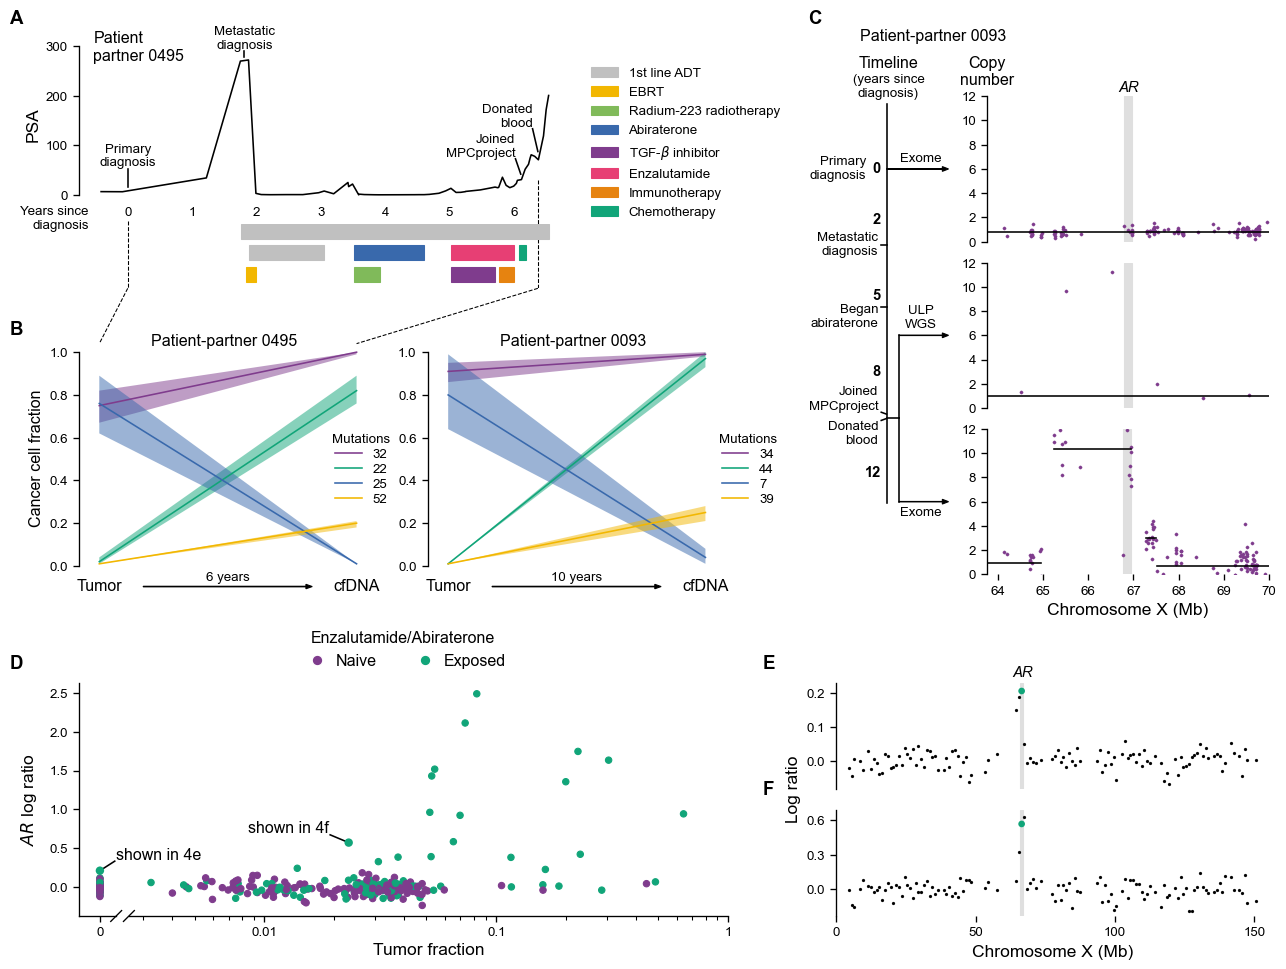

In [31]:
fig4 = plt.figure(figsize=(16, 12))
fig4_inv_transform = fig4.transFigure.inverted()
gs = fig4.add_gridspec(4, 16, width_ratios=[1]*7 + [0.5] + [1]*8, height_ratios = [1.04, 1,  0.01, 1], wspace = 3, hspace = 0.3)

#####################
###### FIG 4A #######
#####################

# this figure is split into two portions - the PSA plot and the drug axis. We also leave some space for the drug legend.
fig4a = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0, :7], height_ratios = [2.4,1], hspace = 0.2)
psa_ax, drug_ax = fig4.add_subplot(fig4a[0]), fig4.add_subplot(fig4a[1])
drug_legend_ax = fig4.add_subplot(gs[0, 7])

# we manually define the y position of the drug bars here
y_val_dict = {0:2, 1: 0, 2:1, 3:2, 4:1, 5:2, 6:1, 7:2, 8:1, 9:2}
for index, row in pt_prtner_0495_clinical.reset_index().iterrows():
    
    y_val = -1*y_val_dict[index]
    x, y = mdates.date2num(row['RELATIVE START DATE']), y_val - patch_height
    width, height = mdates.date2num(row['RELATIVE STOP DATE']) - mdates.date2num(row['RELATIVE START DATE']), patch_height
    drug_patch = mpatches.Rectangle((x, y), width, height, color = color_dict[row['drug_class']],
                                   fill = True, label = row['drug_class'], zorder = 3)
    drug_ax.add_patch(drug_patch)
    
# plot the PSA data
sns.lineplot(data = pt_prtner_0495_psa, x = 'RELATIVE PSA DATE', y = 'PSA', ax = psa_ax, color = 'black')

# edit axes
locs = drug_ax.get_xticks()
labels = [str(text.get_text()) for text in drug_ax.get_xticklabels()]

sns.despine(ax = psa_ax, bottom = True)
drug_ax.get_xaxis().set_visible(False)
drug_ax.get_yaxis().set_visible(False)
drug_ax.set_xlim(psa_ax.get_xlim())
drug_ax.set_ylim([-3, 0])

psa_ax.set_xlabel('')
psa_ax.tick_params(axis = 'x', length = 0)
psa_ax.set_ylim([None, 300])
psa_ax.spines['left'].set_bounds(0, 300)

# creat the legend
handles, labels = drug_ax.get_legend_handles_labels()
new_legend_dict = dict(zip(labels, handles))
rename_dict = {'1st Line ADT': '1st line ADT', 'Clinical Trial': 'Immunotherapy'}
new_legend_dict.update({new_label: new_legend_dict[old_label] for old_label, new_label in rename_dict.items()})
order = ['1st line ADT', 'EBRT', 'Radium-223 radiotherapy', 'Abiraterone', 'TGF-$\\beta$ inhibitor', 'Enzalutamide', 'Immunotherapy', 'Chemotherapy']

drug_legend_ax.legend(handles = [new_legend_dict[label] for label in order], labels = order, 
                      fontsize = 10, bbox_to_anchor = (-5, 0.6), loc = 'center left')
drug_legend_ax.get_xaxis().set_visible(False)
drug_legend_ax.get_yaxis().set_visible(False)

# need to do some interpolation to get accurate date locations
xp = [mdates.date2num(date) for date in pt_prtner_0495_psa['RELATIVE PSA DATE']]
yp = pt_prtner_0495_psa['PSA']
x = [mdates.date2num(date) for date in pt_0495_events.values()]
y = np.interp(x, xp, yp)

lengths = [50, 25, 40, 55]
x_offsets = [0, 0, -40, -40]
ha = ['center', 'center', 'right', 'right']
xbuffers = [0, 0, -10, -10]
ybuffers = [8, 8, 5, 5]

# add labels and lines that point to labels
psa_point_date_dict = {}
for i, (ev, date) in enumerate(pt_0495_events.items()):
    mpl_date = mdates.date2num(date)
    xbuff, ybuff = xbuffers[i], ybuffers[i]
    label = psa_ax.text(x = mpl_date + x_offsets[i], y = y[i] + lengths[i], s = ev, ha = ha[i], fontsize = 10)
    psa_ax.plot([mpl_date + x_offsets[i], mpl_date + xbuff], [y[i] + lengths[i] - 0.8*ybuff, y[i] + ybuff], color = 'black')
    psa_point_date_dict[ev] = (mpl_date + xbuff, y[i] + ybuff)
    
psa_ax.text(s = 'Patient\npartner 0495', x = 0.03, y = 1.1, ha = 'left', va = 'top', transform = psa_ax.transAxes)

# transform psa axis to relative dates
xticks = [365*i + mdates.date2num(pt_0495_events['Primary\ndiagnosis']) for i in range(7)]
xticklabels = range(7)
psa_ax.set_xticks(xticks)
psa_ax.set_xticklabels(xticklabels)

# add an x axis label. Gets cut off so need to transform to figure coordinates
drug_ax.text(x = 0.02, y = 1.28, s = 'Years since\ndiagnosis', 
             va = 'top', ha = 'right', fontsize = 10, zorder = 0, transform = drug_ax.transAxes)

#####################
###### FIG 4B #######
#####################

# This figure is split into the two patient-partners
fig4b = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1,:9], hspace = 0.35)
phylogic_axes = [fig4.add_subplot(fig4b[i]) for i in range(2)]

samples = ['Patient-partner 0495', 'Patient-partner 0093']
labels = [['Tumor', 'cfDNA'], ['Tumor', 'cfDNA']]
color_list = [vivid_10[-2], vivid_10[3], vivid_10[-3], vivid_10[-4], vivid_10[-1]]
years = ['6', '10']
arrow_axes = {}

# plot the results from phylogicNDT
for i, (mut_ccf, cluster_ccf) in enumerate([[pt_prtner_0495_mut_ccf, pt_prtner_0495_cluster_ccf], [pt_prtner_0093_mut_ccf, pt_prtner_0093_cluster_ccf]]):
    
    # use a custom class to handle the phylogic plot
    phylogic_results = phylogic_visualization.PhylogicTwoTPResult(cluster_ccf, mut_ccf)
    phylogic_results.biopsy_sites = labels[i][::-1]

    phylogic_results.plot_phylogic(ax = phylogic_axes[i], size_cutoff = 7, ccf_cutoff = 0.10)
    
    ylabel = 'Cancer cell fraction' if i == 0 else ''
    phylogic_axes[i].set_ylabel(ylabel, fontsize = 12)
    phylogic_axes[i].set_title(samples[i], fontsize = 12, y = 0.95)
    
    bbox_x = 0.83 if i == 0 else 0.96
    phylogic_axes[i].legend(title = 'Mutations', loc = 'center left', bbox_to_anchor = (bbox_x, 0.45), fontsize = 10, labelspacing = 0.2)

    phylogic_axes[i].spines['left'].set_bounds(0, 1)
    
    # now we add arrows in between the dates. Because the arrows need to be drawn BELOW the axis, we actually need
    # to create a new axis specifically for the arrows, as they won't render otherwise
    plt.draw()
    windows = [t.get_window_extent() for t in phylogic_axes[i].get_xticklabels()]
    bottom_corner = (np.max(windows[0].intervalx), np.min(windows[0].intervaly))
    top_corner = (np.min(windows[1].intervalx), np.max(windows[1].intervaly))
    
    # convert to figure coordinates
    bottomc_fig = fig4_inv_transform.transform(bottom_corner)
    topc_fig = fig4_inv_transform.transform(top_corner)
    dx, dy = topc_fig - bottomc_fig
    
    # add the arrow axes and the arrows
    arrow_axes[i] = fig4.add_axes([bottomc_fig[0], bottomc_fig[1], dx, dy])
    sns.despine(ax = arrow_axes[i], bottom = True, left = True)
    arrow_axes[i].get_xaxis().set_visible(False)
    arrow_axes[i].get_yaxis().set_visible(False)
    
    buffer = 0.1
    arrow_axes[i].arrow(x = buffer, y = 0.5, dx = 1 - 2*buffer, dy = 0, length_includes_head = True, 
                   head_length = 0.03, head_width = 0.30, width = 0.04, color = 'black')
    arrow_axes[i].set_ylim([0, 1])
    arrow_axes[i].set_xlim([0, 1])
    
    # add years label
    arrow_axes[i].text(s = years[i] + ' years', x = 0.5, y = 0.7, ha = 'center', va = 'bottom', fontsize = 10)
    
sns.despine(left = True, bottom = True, ax = arrow_axes[0])

#################################
###### 4a - 4b connection #######
#################################

# Here we draw a connection between 4a and 4b. A lot of moving between different figure coordinates.
left = psa_point_date_dict['Primary\ndiagnosis']
right = psa_point_date_dict['Donated\nblood']
left_fig = fig4_inv_transform.transform(psa_ax.transData.transform(left))
right_fig = fig4_inv_transform.transform(psa_ax.transData.transform(right))
bottom_drug = fig4_inv_transform.transform(drug_ax.transData.transform((0, drug_ax.get_ylim()[0])))
top_drug = fig4_inv_transform.transform(drug_ax.transData.transform((0, drug_ax.get_ylim()[1])))

phylo_left = fig4_inv_transform.transform(phylogic_axes[0].transData.transform((0, 1.04)))
phylo_right = fig4_inv_transform.transform(phylogic_axes[0].transData.transform((1, 1.04)))

# draw the lines that connect 4a and 4b
left_line = mlines.Line2D([left_fig[0], left_fig[0]], [left_fig[1] - 0.03, bottom_drug[1]], linestyle = 'dashed', color = 'black',
                          linewidth = 0.8, transform=fig4.transFigure, figure=fig4)
right_line = mlines.Line2D([right_fig[0], right_fig[0]], [right_fig[1] - 0.025, top_drug[1]], linestyle = 'dashed', color = 'black',
                          linewidth = 0.8, transform=fig4.transFigure, figure=fig4)
left_phylo = mlines.Line2D([left_fig[0], phylo_left[0]], [bottom_drug[1], phylo_left[1]], linestyle = 'dashed', color = 'black',
                          linewidth = 0.8, transform=fig4.transFigure, figure=fig4)
phylo_right = mlines.Line2D([right_fig[0], phylo_right[0]], [bottom_drug[1], phylo_right[1]], linestyle = 'dashed', color = 'black',
                          linewidth = 0.8, transform=fig4.transFigure, figure=fig4)

fig4.lines.extend([left_line, right_line, left_phylo, phylo_right])

drug_ax.plot([right[0], right[0]], [-0.7, -3], linestyle = 'dashed', color = 'black',
             linewidth = 0.8, zorder = -1)

#####################
###### FIG 4C #######
#####################

# This figure panel has 4 components - a copy number profile for tumor exome, blood ULP, and blood exome, and a timeline of the clinical history
# It's by far the most involved, as creating the timeline is a fair bit of work. We start by creating the copy number plots.

#################
## Copy number ##
#################

# four subplots - one blank, 3 copy number plots. The blank is to make space for labels.
fig4c = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs[:2,10:], hspace = 0.18, height_ratios = [0.2, 1, 1, 1], width_ratios = [1,3], wspace = 0.2)
ar_cna_axes = [fig4.add_subplot(fig4c[i, 1]) for i in range(1, 4)]

# remove a blank ax - reserve space for labels
blank_ax = fig4.add_subplot(fig4c[0, :])
sns.despine(ax = blank_ax, bottom = True, left = True)
blank_ax.get_xaxis().set_visible(False)
blank_ax.get_yaxis().set_visible(False)

blank_ax.text(s = 'Patient-partner 0093', x = 0.01, y = 1.6, ha = 'left', va = 'top', transform = blank_ax.transAxes)
blank_ax.patch.set_alpha(0)

# now we plot the copy number data - ffpe exome, blood ulp, then blood exome
for i, (seq_type, coverage_data, segmentation_data) in enumerate([['ffpe', ffpe_coverage, ffpe_segmentation], ['ulp', blood_ulp_coverage, blood_ulp_segmentation], ['bbx', blood_exome_coverage, blood_exome_segmentation]]):
    
    # copy the data to allow cell reruns
    coverage = coverage_data.copy()
    segmentation = segmentation_data.copy()
    
    # for coverage files, calculate the center of the window
    coverage['loc'] = (coverage['start'] + coverage['end']) // 2

    # convert gatk to log2
    if seq_type in ['ffpe', 'bbx']:
        segmentation['logR'] =  np.log(segmentation['logR'])/np.log(2)
        
    # calculate absolute cn, using purity and ploidy
    purity, ploidy = purity_ploidy[i]
    coverage['absolute_CN'] = (np.power(2, coverage['logR']) - 1*(1 - purity))/purity
    segmentation['absolute_CN'] = (np.power(2, segmentation['logR']) - 1*(1 - purity))/purity
    
    # create a copy number object for easier plotting
    copy_num_obj = copynumber.CopyNumber('0093')
    copy_num_obj.set_coverage(coverage, cov_values = ['absolute_CN'])
    copy_num_obj.set_segments(segmentation, seg_values = ['absolute_CN'])

    # visualize the AR locus (+/- 3 Mb)
    copy_num_obj.visualize_profile(ar_cna_axes[i], ylim = [0, 12], window = ('X', ar_start - 3e6, ar_end + 3e6), 
                                   scatter_kwargs = {'s': 6, 'edgecolor': None})
    
    if seq_type == 'bbx':
        ar_cna_axes[i].set_xlabel('Chromosome X (Mb)')
    else:
        ar_cna_axes[i].set_xlabel('')
        ar_cna_axes[i].set_xticks([])

    ar_cna_axes[i].set_ylabel('')
    ar_cna_axes[i].set_yticks([0, 2, 4, 6, 8, 10, 12])
    
    span_color = mimic_alpha.colorAlpha_to_rgb(['grey'], 0.25)[0]
    ar_cna_axes[i].axvspan(ar_start, ar_end, color=span_color, zorder=-1)
    sns.despine(bottom = True, ax = ar_cna_axes[i])
        
ar_cna_axes[0].text(x = 66857167.5, y = 12.1, s = 'AR', fontsize = 11, ha = 'center', va = 'bottom', fontstyle = 'italic')

##############
## Timeline ##
##############

# We create a subplot to hold the timeline
ax_4c_timeline = fig4.add_subplot(fig4c[1:, 0])
ax_4c_timeline.set_ylim([0, 1])
ax_4c_timeline.set_xlim([-1.5, 0])
sns.despine(ax = ax_4c_timeline, left = True, bottom = True, top = True, right = True)
ax_4c_timeline.tick_params(axis = 'y', length = 0)
ax_4c_timeline.get_xaxis().set_visible(False)

# inverse transform for data plotting. Needed to determine the location
# of the copy number profiles within the figure for connections to the timeline
inv_timeline_ax = ax_4c_timeline.transData.inverted()

# we begin by plotting the branches - extensions from the timeline that meet the copy number profiles
# plot the first branch - primary diagnosis
primary_branch = inv_timeline_ax.transform(ar_cna_axes[0].transAxes.transform((1, 0.5)))
ax_4c_timeline.arrow(x = -1, y = primary_branch[1], dx = 1, dy = 0, length_includes_head = True, 
                     head_length = 0.1, head_width = 0.01, color = 'black')

# plot the later branches - ulp and bbx, connected at midline
sec_branch = inv_timeline_ax.transform(ar_cna_axes[1].transAxes.transform((0, 0.5)))
tert_branch = inv_timeline_ax.transform(ar_cna_axes[2].transAxes.transform((0, 0.5)))
midline = np.mean([sec_branch[1], tert_branch[1]])

# we draw these branches and then connect them
branchpoint = -0.8
ax_4c_timeline.plot([-1, branchpoint], [midline, midline], color = 'black')
ax_4c_timeline.plot([branchpoint, branchpoint], [midline, sec_branch[1]], color = 'black')
ax_4c_timeline.plot([branchpoint, branchpoint], [midline, tert_branch[1]], color = 'black')
ax_4c_timeline.arrow(x = branchpoint, y = sec_branch[1], dx = -branchpoint, dy = 0, length_includes_head = True, 
                     head_length = 0.1, head_width = 0.01, color = 'black')
ax_4c_timeline.arrow(x = branchpoint, y = tert_branch[1], dx = -branchpoint, dy = 0, length_includes_head = True, 
                     head_length = 0.1, head_width = 0.01, color = 'black')

ax_4c_timeline.text(s = 'Exome', x = -0.45, y = primary_branch[1] + 0.01, ha = 'center', va = 'bottom', fontsize = 10)
ax_4c_timeline.text(s = 'ULP\nWGS', x = -0.45, y = sec_branch[1] + 0.01, ha = 'center', va = 'bottom', fontsize = 10)
ax_4c_timeline.text(s = 'Exome', x = -0.45, y = tert_branch[1] - 0.01, ha = 'center', va = 'top', fontsize = 10)

# convert to dates. Defining the location of the primary diagnosis and blood biopsy defines the scale
blood_points = (midline, events_0093['Donated\nblood'])
prim_points = (primary_branch[1], events_0093['Primary\ndiagnosis'])
date2plot = figures.date2plotcoords(blood_points, prim_points)

# define the years relative to the diagnosis date. Two flanking dates (1998 and 2013) are added
# to provide a buffer for text labelling
year_locs = [date2plot(mdates.date2num(datetime.datetime(year, 1, 1, 0, 0))) for year in (1998, 2000, 2002, 2005, 2008, 2012, 2013)]
years = ['0', '2', '5', '8', '12']

# add "y axis" - the central black line of the timeline
ax_4c_timeline.plot([-1,-1], [year_locs[-1] - 0.01, year_locs[0] + 0.03], color = 'black')
ax_4c_timeline.set_xlim([None, 0.016])

# add the year labels
ax_4c_timeline.spines['right'].set_position('center')
ax_4c_timeline.set_yticks(year_locs[1:-1])
ax_4c_timeline.set_yticklabels(years, fontsize = 11, va = 'center', fontweight = 'bold')
ax_4c_timeline.tick_params(axis = 'y', pad = -19)

# shift some labels around to avoid overlapping with dates
buffer_dict = {'Primary\ndiagnosis': (-0.2, 0), 'Began\nabiraterone': (0, -0.02), 
               'Donated\nblood': (0, -0.031), 'Joined\nMPCproject': (0, 0.03145)}
ax_4c_transform = ax_4c_timeline.transData.inverted()
for ev, date in events_0093.items():
    plot_y = date2plot(date)
    shifted_plot_y = plot_y + buffer_dict.get(ev, [0, 0])[1]
    shifted_plot_x = -1.13 + buffer_dict.get(ev, [0, 0])[0]
    label = ax_4c_timeline.text(s = ev, x = shifted_plot_x, y = shifted_plot_y, ha = 'right', va = 'center', fontsize = 10)
    plt.draw()
    
    if ev in ['Joined\nMPCproject', 'Donated\nblood']:
        bbox = label.get_window_extent().get_points()
        line_start = bbox[0][1] if ev == 'Joined\nMPCproject' else bbox[1][1]
        line_start = ax_4c_transform.transform([0, line_start])[1]
    else:
        line_start = plot_y

    # connect text labels to plot
    if ev != 'Primary\ndiagnosis':
        ax_4c_timeline.plot([-1, -1.085], [plot_y, line_start], color = 'black')

# Now we label the timeline and copy number
timeline = ax_4c_timeline.text(s = 'Timeline', x = -0.35, y = 1.28, transform = ar_cna_axes[0].transAxes, ha = 'center', fontsize = 12, va = 'top')
ax_4c_timeline.text(s = '(years since\ndiagnosis)', x = -0.35, y = 0.98, transform = ar_cna_axes[0].transAxes, ha = 'center', va = 'bottom', 
                    fontsize = 10)
ar_cna_axes[0].text(s = 'Copy\nnumber', x = 0, y = 1.28, ha = 'center', va = 'top', transform = ar_cna_axes[0].transAxes, 
                    fontsize = 12)
ar_cna_axes[-1].set_xticks(np.arange(64, 71, 1)*10**6)
ar_cna_axes[-1].ticklabel_format(axis = 'x', style = 'plain')
ar_cna_axes[-1].set_xticklabels([str(num) for num in range(64, 71)])
    
# for some reason this despine needs to happen at the end. This occasionally happens with despine
sns.despine(ax = drug_legend_ax, bottom = True, left = True)
sns.despine(ax = drug_ax, bottom = True, left = True)

#####################
###### FIG 4D #######
#####################

# Figure 4d, e, and f go in their own subplot because their spacing needs to be a little different 
fig4def = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[3, :], height_ratios = [1, 1], width_ratios = [1.5, 1])
bax = brokenaxes(xlims=((-0.003, 0.0023), (0.0026, 1)), wspace=0.04, width_ratios = [1, 16], d = 0.005, subplot_spec = fig4def[:, 0])

# we define two points that we want to highlight further in 4e and 4f - they are the maximum logR values for TF = 0 and TF < 0.03 respectively
point1 = relative_ar_amp_treatment.query('tumor_fraction == 0').sort_values(by = 'logR', ascending = False).iloc[[0]]
point2 = relative_ar_amp_treatment.query('tumor_fraction < 0.03').sort_values(by = 'logR', ascending = False).iloc[[0]]
special_points = pd.concat([point1, point2])

# first we plot the main data (dropping these special points)
main_data = relative_ar_amp_treatment.drop(index =[point1.index[0], point2.index[0]])
bax.scatter(x = main_data['tumor_fraction'], y = main_data['logR'], 
            c = main_data['Enzalutamide/abiraterone'].apply(lambda status: color_palette[status]).to_list())

# and then we plot the special data, increasing the point size
bax.scatter(x = special_points['tumor_fraction'], y = special_points['logR'], 
            c = special_points['Enzalutamide/abiraterone'].apply(lambda status: color_palette[status]).to_list(), 
            ec = None, s = 40)

# separate the axes of the broken axis plot for further formatting. Log scale the right plot
left_ax, right_ax = bax.axs
right_ax.set_xscale('log')

formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y)) # https://stackoverflow.com/a/49306588/3904031
right_ax.xaxis.set_major_formatter(formatter)

left_ax.set_xticks([0])
left_ax.set_xticklabels([0])

right_ax.set_xlabel('Tumor fraction', labelpad = 3)
bax.set_ylabel(r'$\it{AR}$ log ratio')

# add text for the special points and connect to the text box
label_4e = fig4.text(s = 'shown in 4e', x = 0.0023, y = 0.35, zorder = 3, transform = left_ax.transData, ha = 'left')
label_4f = fig4.text(s = 'shown in 4f', x = 0.019, y = 0.7, zorder = 3, transform = right_ax.transData, ha = 'right')

left_ax.plot([point1['tumor_fraction'].iloc[0], 0.0021], [point1['logR'].iloc[0], 0.33], color = 'black', zorder = -1)
right_ax.plot([point2['tumor_fraction'].iloc[0], 0.0192], [point2['logR'].iloc[0], 0.67], color = 'black', zorder = -1)

# manually make legend
exposed = mlines.Line2D(xdata = [0], ydata = [0], marker='o', markerfacecolor=color_palette['exposed'], markersize=8, 
                       label='Exposed', color = 'w')
naive = mlines.Line2D(xdata = [0], ydata = [0], marker='o', markerfacecolor=color_palette['naive'], markersize=8, 
                       label='Naive', color = 'w')
bax.legend(handles=[naive, exposed], ncol = 2, title = 'Enzalutamide/Abiraterone', 
           title_fontsize = 12, bbox_to_anchor = (0.5, 1), loc = 'lower center', handletextpad = 0.2)

#####################
#### FIG 4E & F #####
#####################

# Here we plot the coverage data along the X chromosome of our special points
figure4e = fig4.add_subplot(fig4def[0, 1])
figure4f = fig4.add_subplot(fig4def[1, 1], sharex = figure4e)

# loop through the special points, plotting the relative_logR of the X chromosome
for i, (ax, sampleid) in enumerate(zip([figure4e, figure4f], special_points['sample'])):
    sample_x = updated_compiled_coverage_data[(updated_compiled_coverage_data['sample'] == sampleid)].copy()
    
    copy_num_obj = copynumber.CopyNumber(sampleid)
    
    # drop the interval that contains AR because it will be plotted in green
    copy_num_obj.set_coverage(sample_x.drop(index = sample_x[sample_x['loc'] == 66500000.5].index), cov_values = ['logR'])
    
    # plot the coverage around AR (expanding the window to include most of X chromosome)
    plot_ax = copy_num_obj.visualize_profile(ax, segments = False, window = ar_window, cov_colors = ['black'])
    
    # now plot just the point of interest - the point at the center of the window that contains AR.
    # we make it a bit bigger than surrounding points and change its color
    point = special_points.set_index('sample').loc[[sampleid]]
    point_plot = sns.scatterplot(x = [66500000.5], y = 'logR', data = point, ax = plot_ax,
                    color = palettable.cartocolors.qualitative.Bold_10.mpl_colors[1],
                    ec = None, s = 25, zorder = 3)
    
    # denote interval that contains AR
    plot_ax.axvspan(xmin = 66000001, xmax = 67000000, color = [0.8754902, 0.8754902, 0.8754902], zorder=-1)
    
    # some axis formatting
    if i == 1:
        plot_ax.set_xticks([0, 50*10**6, 100*10**6, 150*10**6])
        plot_ax.set_xticklabels([0, 50, 100, 150])
        plot_ax.set_yticks([0, 0.3, 0.6])
        plot_ax.set_ylim([None, 0.69])
        plot_ax.set_xlabel('Chromosome X (Mb)')
        plot_ax.set_ylabel('Log ratio', y = 1.2)
        
    else:
        plot_ax.get_xaxis().set_visible(False)
        plot_ax.set_ylabel('')
        plot_ax.set_ylim([None, 0.23])
        plot_ax.set_yticks([0, 0.1, 0.2])
        plot_ax.text(x = 66857167.5, y = 0.24, s = 'AR', fontsize = 11, ha = 'center', va = 'bottom', fontstyle = 'italic')
        
    sns.despine(ax = plot_ax, bottom = True)

#### Add figure panel labels
xcoords = [0.08, 0.08, 0.60, 0.08, 0.57, 0.57]
ycoords = [0.90, 0.63, 0.90, 0.34, 0.34, 0.23]

for label, xcoord, ycoord in zip(['A', 'B', 'C', 'D', 'E', 'F'], xcoords, ycoords):
    fig4.text(s = label, x = xcoord, y = ycoord, transform = fig4.transFigure, weight = 'bold', fontsize = 14)
    
# here, we hack into the phylogic plots and convert alpha to absolute colors for manuscript submission
for phy_ax in phylogic_axes:
    children = phy_ax.get_children()
    for child in children:
        if isinstance(child, mcollections.PolyCollection):
            child.set_rasterized(True)

fig4.savefig('figures/figure4.png', dpi = 300, bbox_inches = 'tight')
fig4.savefig('figures/figure4.svg', bbox_inches = 'tight')
fig4.savefig('figures/figure4.pdf', bbox_inches = 'tight')

In [32]:
# enza/abi is associated with higher tumor fractions
exposed = relative_ar_amp_treatment[relative_ar_amp_treatment['Enzalutamide/abiraterone'] == "exposed"]
naive = relative_ar_amp_treatment[relative_ar_amp_treatment['Enzalutamide/abiraterone'] == "naive"]
scipy.stats.mannwhitneyu(exposed['tumor_fraction'], naive['tumor_fraction'])

MannwhitneyuResult(statistic=14205.5, pvalue=0.0011516995278421872)

In [33]:
# enza exposure status is associated with tumor fraction across a range of tumor fractions
X = (relative_ar_amp_treatment['Enzalutamide/abiraterone'] == 'exposed').astype(int)
y = relative_ar_amp_treatment['tumor_fraction'].values

X2 = sm.add_constant(X)

ols_model=sm.OLS(y,X2)
result=ols_model.fit()
summary = result.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     14.32
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           0.000185
Time:                        14:38:44   Log-Likelihood:                 439.40
No. Observations:                 318   AIC:                            -874.8
Df Residuals:                     316   BIC:                            -867.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   